In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve
import datasets
import joblib
import os
from sklearn.base import clone
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Grammar_autocorrection_df1_new.csv')

In [ ]:
df.head()

,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Length,Standard Length,Tokenized Ungrammatical,Tokenized Standard,POS_Ungrammatical,POS_Standard,POS_W2V_Ungram,...,W2V_Ungram,W2V_Standard,Bigrams_Ungrammatical,Bigrams_Standard,Trigrams_Ungrammatical,Trigrams_Standard,W2V_Bigrams_Ungrammatical,W2V_Bigrams_Standard,W2V_Trigrams_Ungrammatical,W2V_Trigrams_Standard
0,verb tense errors,i goes to the store everyday,i go to the store everyday,29,27,"['i', 'goes', 'to', 'the', 'store', 'everyday']","['i', 'go', 'to', 'the', 'store', 'everyday']","[('i', 'NN'), ('goes', 'VBZ'), ('to', 'TO'), (...","[('i', 'NN'), ('go', 'VBP'), ('to', 'TO'), ('t...",[-0.05809515 0.01783396 -0.04000585 -0.029335...,...,[-0.25307396 0.38753447 0.12815507 0.002139...,[-2.57038862e-01 3.94539833e-01 1.34749040e-...,"['i goes', 'goes to', 'to the', 'the store', '...","['i go', 'go to', 'to the', 'the store', 'stor...","['i goes to', 'goes to the', 'to the store', '...","['i go to', 'go to the', 'to the store', 'the ...",[-0.01590267 0.0092206 0.01702413 0.007214...,[-0.01507249 0.0093211 0.01426298 0.001468...,[ 0.000182 -0.00960081 -0.00464323 -0.001559...,[ 2.55777827e-03 -1.09127536e-02 -5.58695942e-...
1,verb tense errors,they was playing soccer last night,they were playing soccer last night,35,36,"['they', 'was', 'playing', 'soccer', 'last', '...","['they', 'were', 'playing', 'soccer', 'last', ...","[('they', 'PRP'), ('was', 'VBD'), ('playing', ...","[('they', 'PRP'), ('were', 'VBD'), ('playing',...",[-0.08381467 -0.02751086 -0.13824302 -0.081639...,...,[-0.29246518 0.4233748 0.13720785 -0.001242...,[-0.2759587 0.42541686 0.14302038 0.004060...,"['they was', 'was playing', 'playing soccer', ...","['they were', 'were playing', 'playing soccer'...","['they was playing', 'was playing soccer', 'pl...","['they were playing', 'were playing soccer', '...",[-2.33705810e-04 -8.36311840e-04 -1.42225740e-...,[-0.00399373 0.00028766 0.00464122 -0.004515...,[ 3.7757077e-03 -9.6596004e-03 -1.7254176e-03 ...,[ 3.1686155e-05 -8.6840112e-03 -6.0305628e-04 ...
2,verb tense errors,she have completed her homework,she has completed her homework,32,31,"['she', 'have', 'completed', 'her', 'homework']","['she', 'has', 'completed', 'her', 'homework']","[('she', 'PRP'), ('have', 'VBP'), ('completed'...","[('she', 'PRP'), ('has', 'VBZ'), ('completed',...",[-0.17465492 -0.05623251 -0.19048372 -0.108243...,...,[-0.24906209 0.3985961 0.15148704 -0.001935...,[-0.27222693 0.39750606 0.13673964 -0.007208...,"['she have', 'have completed', 'completed her'...","['she has', 'has completed', 'completed her', ...","['she have completed', 'have completed her', '...","['she has completed', 'has completed her', 'co...",[-0.01044701 -0.00508266 0.00596283 -0.001086...,[-0.01140992 -0.00751064 -0.00680548 0.003291...,[ 0.00672557 0.0082615 -0.00869436 -0.008153...,[-4.45146440e-03 -4.45180899e-03 1.08439224e-...
3,verb tense errors,he do not know the answer,he does not know the answer,25,27,"['he', 'do', 'not', 'know', 'the', 'answer']","['he', 'does', 'not', 'know', 'the', 'answer']","[('he', 'PRP'), ('do', 'VBZ'), ('not', 'RB'), ...","[('he', 'PRP'), ('does', 'VBZ'), ('not', 'RB')...",[-2.28820860e-01 9.21042785e-02 -2.17044070e-...,...,[-2.86241472e-01 4.44435954e-01 1.82092533e-...,[-0.27761793 0.42448255 0.16640162 0.011298...,"['he do', 'do not', 'not know', 'know the', 't...","['he does', 'does not', 'not know', 'know the'...","['he do not', 'do not know', 'not know the', '...","['he does not', 'does not know', 'not know the...",[ 1.29747409e-02 2.87026470e-03 2.59466819e-...,[ 0.0090581 -0.00334285 0.00243307 -0.013148...,[ 5.7480861e-03 3.0125773e-03 2.5859317e-03 ...,[ 7.0011639e-03 1.2804795e-02 2.6016627e-03 ...
4,verb tense errors,the sun rise in the east,the sun rises in the east,25,26,"['the', 'sun', 'rise', 'in', 'the', 'east']","['the', 'sun', 'rises', 'in', 'the', 'east']","[('the', 'DT'), ('sun', 'NN'), ('rise', 'NN'),...","[('the', 'DT'), ('sun', 'NN'), ('r

In [ ]:
# printing dataset columns
print(df.columns)

Index(['Error Type', 'Ungrammatical Statement', 'Standard English',
       'Ungrammatical Length', 'Standard Length', 'Tokenized Ungrammatical',
       'Tokenized Standard', 'POS_Ungrammatical', 'POS_Standard',
       'POS_W2V_Ungram', 'POS_W2V_Standard', 'POS_seq_U', 'POS_seq_S',
       'W2V_Ungram', 'W2V_Standard', 'Bigrams_Ungrammatical',
       'Bigrams_Standard', 'Trigrams_Ungrammatical', 'Trigrams_Standard',
       'W2V_Bigrams_Ungrammatical', 'W2V_Bigrams_Standard',
       'W2V_Trigrams_Ungrammatical', 'W2V_Trigrams_Standard'],
      dtype='object')


# Naive Bayes

In [5]:
embedding_experiments = {
    'POS':     ('POS_W2V_Ungram',             'POS_W2V_Standard'),
    'Unigram': ('W2V_Ungram',                 'W2V_Standard'),
    'Bigram':  ('W2V_Bigrams_Ungrammatical',  'W2V_Bigrams_Standard'),
    'Trigram': ('W2V_Trigrams_Ungrammatical', 'W2V_Trigrams_Standard')
}

In [ ]:
# Ensure save directory exists
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# Define & apply parser once
def parse_embedding(s):
    if isinstance(s, str):
        return np.array([float(x) for x in s.strip('[]').split()], dtype=float)
    return np.zeros(0, dtype=float)

for ug_col, st_col in embedding_experiments.values():
    df[ug_col] = df[ug_col].apply(parse_embedding)
    df[st_col] = df[st_col].apply(parse_embedding)

# Helper to stack feature arrays
def stack_feats(X):
    return np.vstack(X['feat'])

# Pipeline builder for Naive Bayes
def make_embedding_pipeline_nb(ug_col, st_col):
    n = len(df)
    feats = list(df[ug_col]) + list(df[st_col])
    y     = np.array([0]*n + [1]*n)  # 0=ungrammatical, 1=correct
    X_df  = pd.DataFrame({'feat': feats})

    stacker = FunctionTransformer(stack_feats, validate=False)
    pipe    = Pipeline([
        ('stack', stacker),
        ('clf',   GaussianNB() )
    ])
    return pipe, X_df, y

# Train/Test split evaluation (90/10) & save models
print("=== Train/Test split 90/10 with Naive Bayes ===")
trained_pipelines = {}

for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_nb(ug, st)

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_df, y,
        test_size=0.1,
        stratify=y,
        random_state=42
    )

    # Train & evaluate
    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_te)
    trained_pipelines[name] = pipe

    # Print metrics
    print(f"\n{name} accuracy: {accuracy_score(y_te, preds):.4f}")
    print(classification_report(y_te, preds, digits=4))

    # Save trained pipeline
    model_path = os.path.join(save_dir, f"{name}_nb_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved model to {model_path}")


=== Train/Test split 90/10 with Naive Bayes ===

POS accuracy: 0.5545
              precision    recall  f1-score   support

           0     0.5655    0.4703    0.5135       202
           1     0.5466    0.6386    0.5890       202

    accuracy                         0.5545       404
   macro avg     0.5560    0.5545    0.5513       404
weighted avg     0.5560    0.5545    0.5513       404

Saved model to saved_models/POS_nb_pipeline.pkl

Unigram accuracy: 0.5025
              precision    recall  f1-score   support

           0     0.5020    0.6089    0.5503       202
           1     0.5031    0.3960    0.4432       202

    accuracy                         0.5025       404
   macro avg     0.5026    0.5025    0.4968       404
weighted avg     0.5026    0.5025    0.4968       404

Saved model to saved_models/Unigram_nb_pipeline.pkl

Bigram accuracy: 0.5099
              precision    recall  f1-score   support

           0     0.5074    0.6832    0.5823       202
           1    

In [ ]:
# Save directory
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

print("\n=== 10-Fold Cross Validation with Naive Bayes ===")
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# To store ROC plotting data
roc_data = {}

for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_nb(ug, st)
    accs, precs, recs, f1s = [], [], [], []
    all_y_true = []
    all_y_probs = []

    for train_idx, test_idx in cv.split(X_df, y):
        p = clone(pipe)
        X_train, X_test = X_df.iloc[train_idx], X_df.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        p.fit(X_train, y_train)
        preds = p.predict(X_test)
        probs = p.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, preds))
        precs.append(precision_score(y_test, preds))
        recs.append(recall_score(y_test, preds))
        f1s.append(f1_score(y_test, preds))

        all_y_true.extend(y_test)
        all_y_probs.extend(probs)

    # Store for separate plotting
    roc_data[name] = (all_y_true, all_y_probs)

    # Print metrics
    print(
        f"{name} - CV Accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f} | "
        f"Precision: {np.mean(precs):.4f} ± {np.std(precs):.4f} | "
        f"Recall: {np.mean(recs):.4f} ± {np.std(recs):.4f} | "
        f"F1: {np.mean(f1s):.4f} ± {np.std(f1s):.4f}"
    )

    # Final training on full data
    pipe.fit(X_df, y)
    model_path = os.path.join(save_dir, f"{name}_CV_nb_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved final CV model to {model_path}")



=== 10-Fold Cross Validation with Naive Bayes ===
POS - CV Accuracy: 0.5312 ± 0.0269 | Precision: 0.5260 ± 0.0217 | Recall: 0.6362 ± 0.0322 | F1: 0.5757 ± 0.0237
Saved final CV model to saved_models/POS_CV_nb_pipeline.pkl
Unigram - CV Accuracy: 0.5131 ± 0.0245 | Precision: 0.5165 ± 0.0300 | Recall: 0.4376 ± 0.0437 | F1: 0.4725 ± 0.0308
Saved final CV model to saved_models/Unigram_CV_nb_pipeline.pkl
Bigram - CV Accuracy: 0.5042 ± 0.0200 | Precision: 0.5066 ± 0.0300 | Recall: 0.3112 ± 0.0391 | F1: 0.3846 ± 0.0358
Saved final CV model to saved_models/Bigram_CV_nb_pipeline.pkl
Trigram - CV Accuracy: 0.5089 ± 0.0202 | Precision: 0.5109 ± 0.0262 | Recall: 0.4103 ± 0.0386 | F1: 0.4545 ± 0.0312
Saved final CV model to saved_models/Trigram_CV_nb_pipeline.pkl



=== Visualization for POS ===


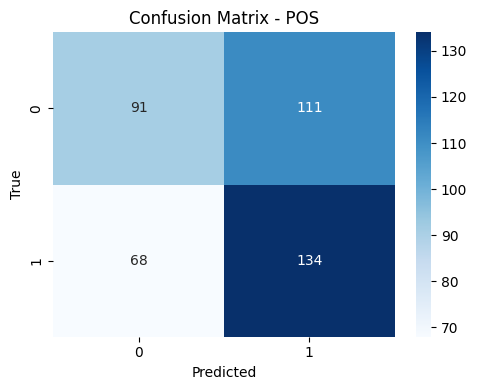

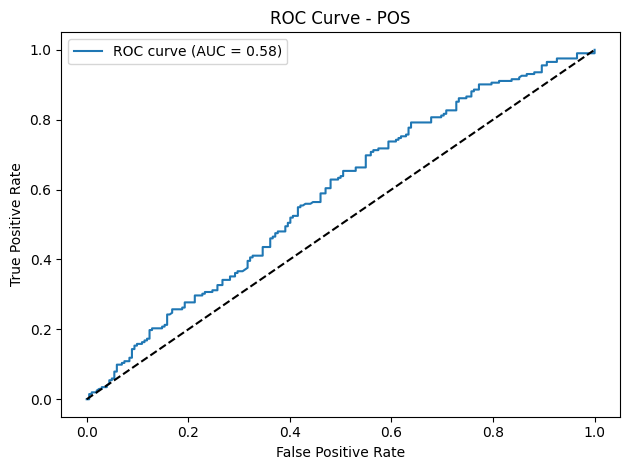

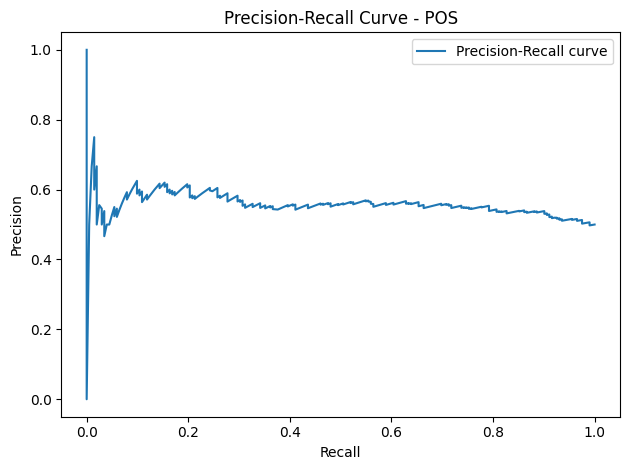


=== Visualization for Unigram ===


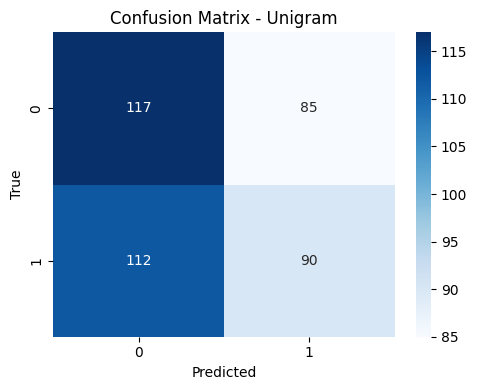

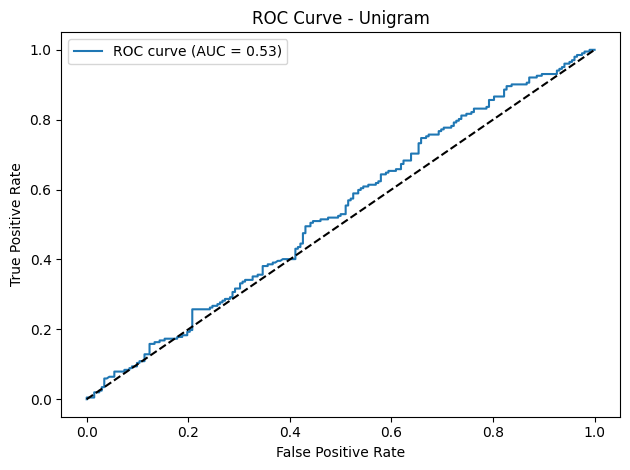

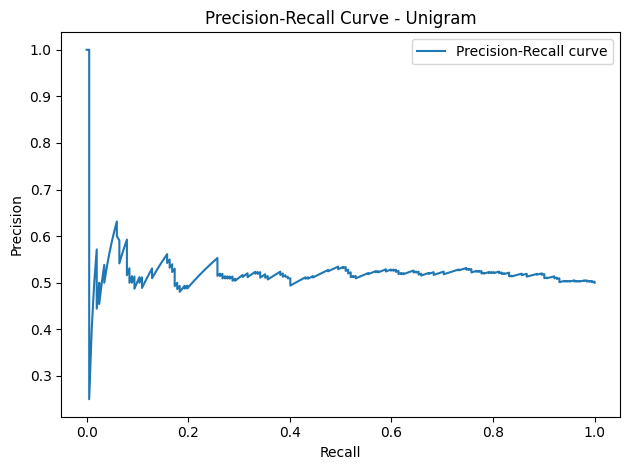


=== Visualization for Bigram ===


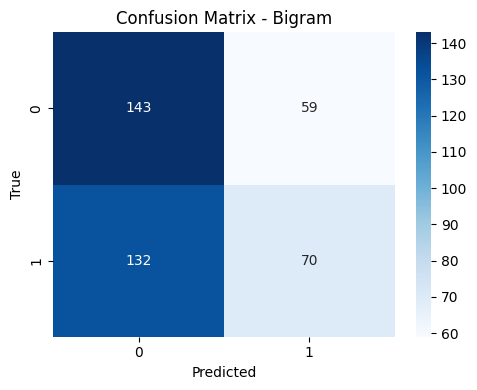

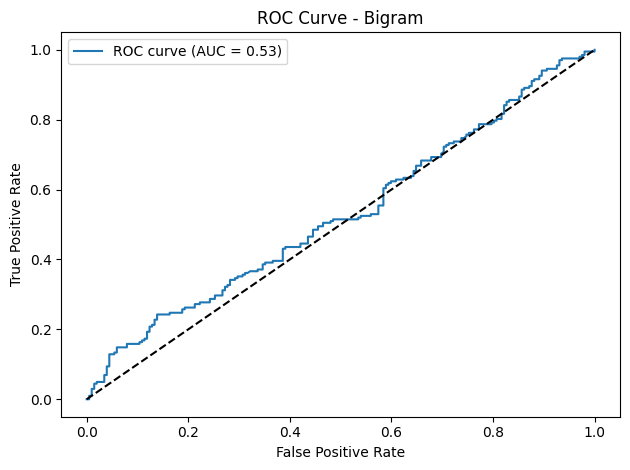

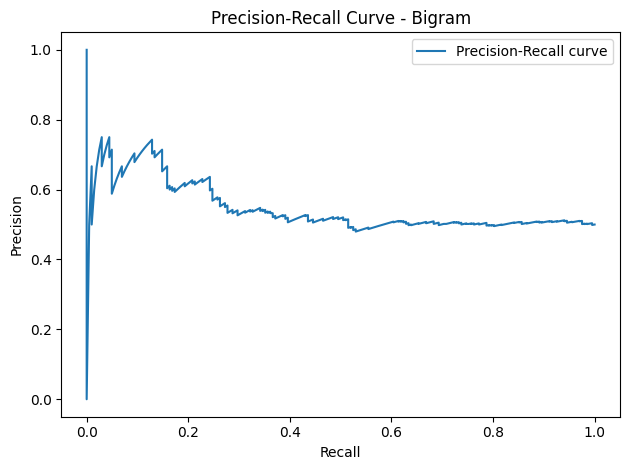


=== Visualization for Trigram ===


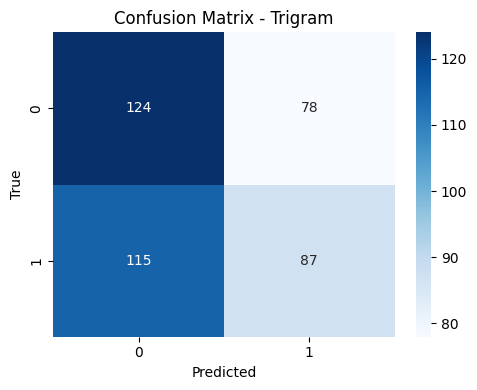

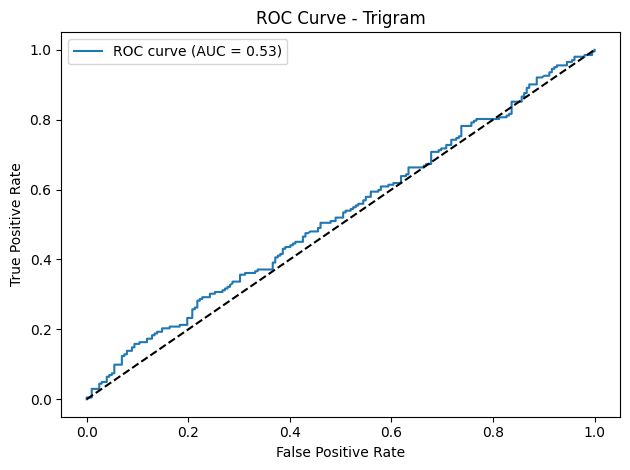

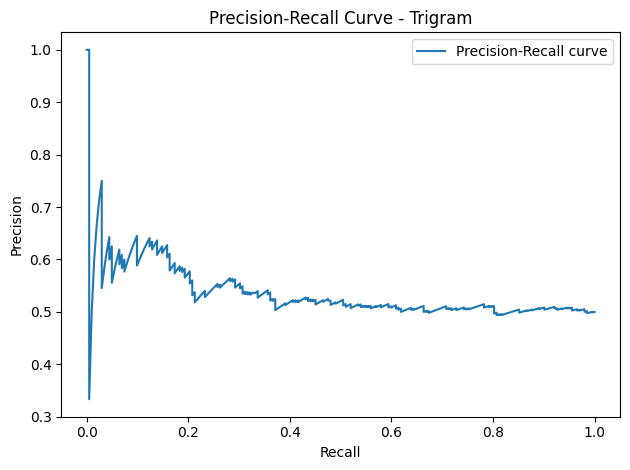

In [ ]:
# Define the embedding types you want to visualize
embedding_types = ['POS', 'Unigram', 'Bigram', 'Trigram']

# Load models and visualize
for name in embedding_types:
    print(f"\n=== Visualization for {name} ===")

    # Load the model
    model_path = os.path.join(save_dir, f"{name}_CV_nb_pipeline.pkl")
    pipe = joblib.load(model_path)

    # Rebuild data
    ug_col, st_col = embedding_experiments[name]
    pipe_, X_df, y = make_embedding_pipeline_nb(ug_col, st_col)

    # Use 10% of data for visualization as test set
    _, X_te, _, y_te = train_test_split(X_df, y, test_size=0.1, stratify=y, random_state=42)
    preds = pipe.predict(X_te)
    probs = pipe.predict_proba(X_te)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_te, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_confusion_matrix.png"))
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_te, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_roc_curve.png"))
    plt.show()

    precision, recall, _ = precision_recall_curve(y_te, probs)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_precision_recall_curve.png"))
    plt.show()

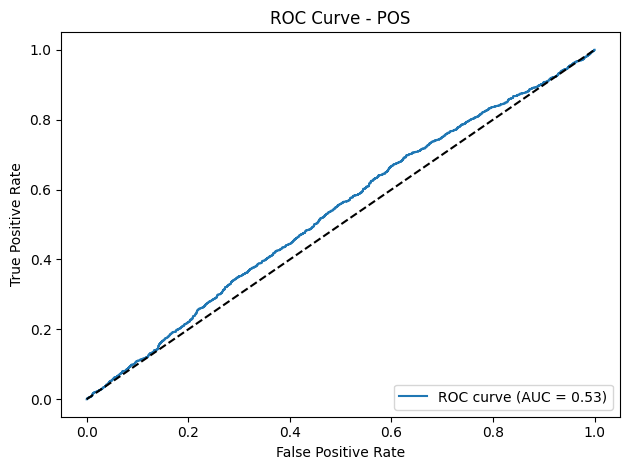

Saved ROC curve to saved_models/POS_CV_ROC_curve.png


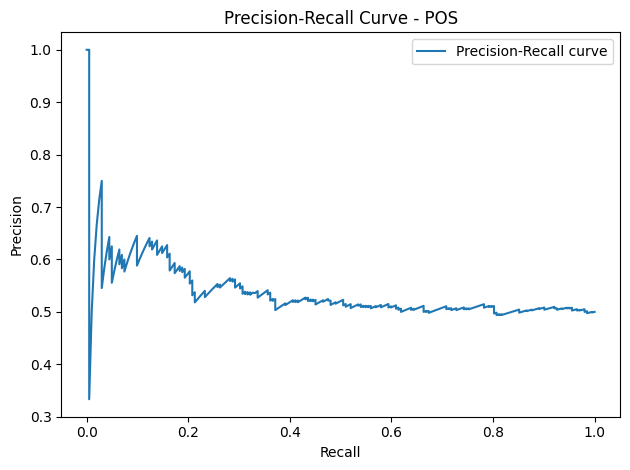

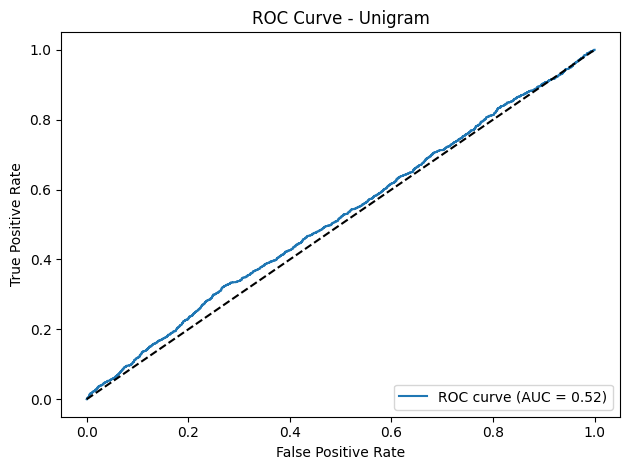

Saved ROC curve to saved_models/Unigram_CV_ROC_curve.png


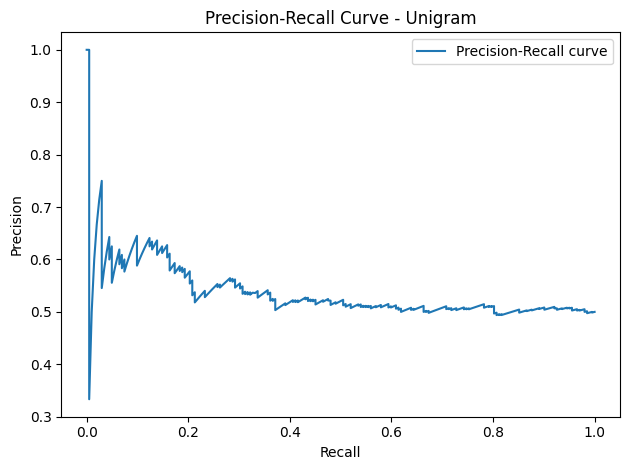

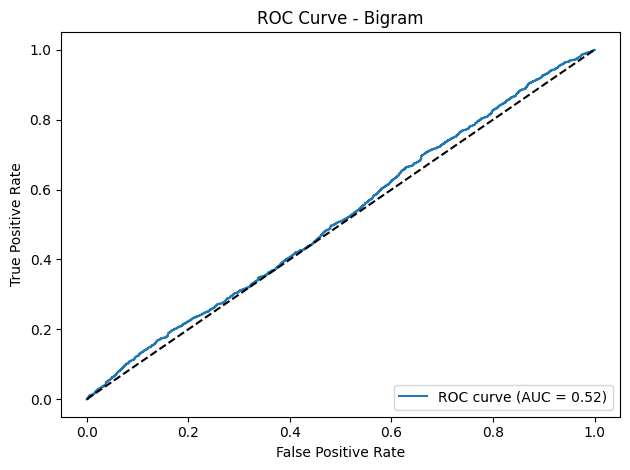

Saved ROC curve to saved_models/Bigram_CV_ROC_curve.png


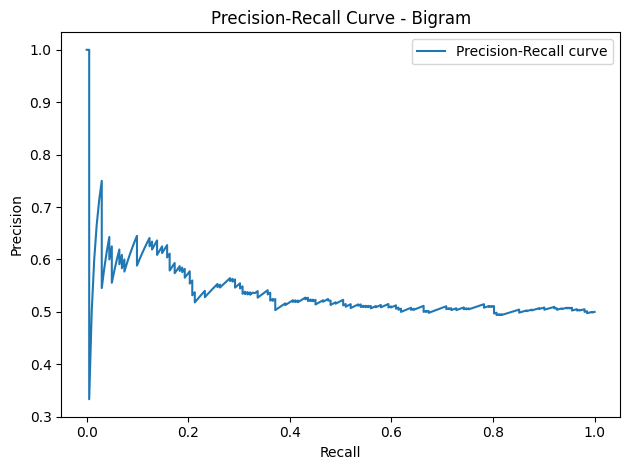

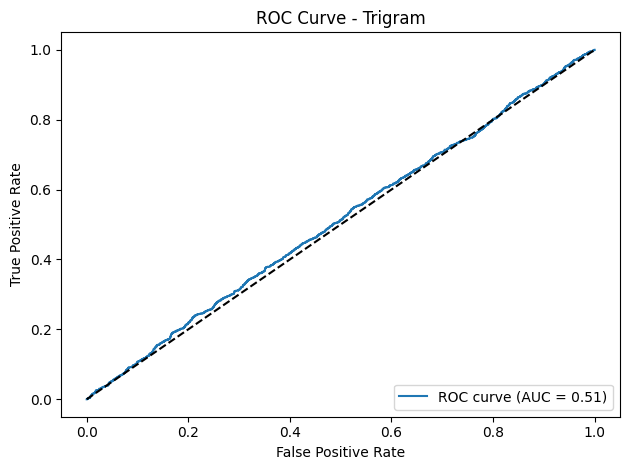

Saved ROC curve to saved_models/Trigram_CV_ROC_curve.png


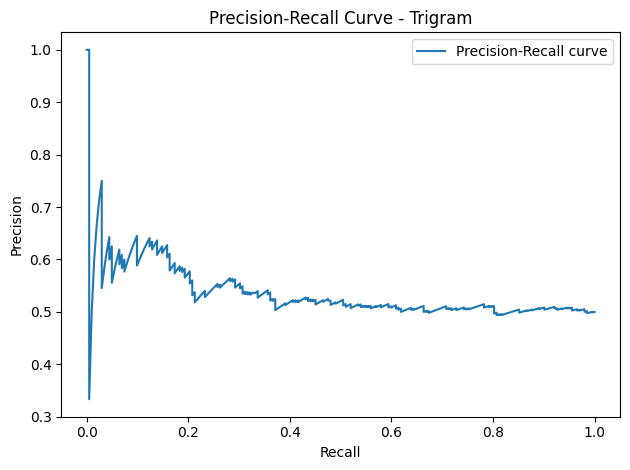

In [ ]:
# Plot ROC for each embedding type
for name, (y_true, y_probs) in roc_data.items():
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.tight_layout()

    roc_path = os.path.join(save_dir, f"{name}_CV_ROC_curve.png")
    plt.savefig(roc_path)
    plt.show()
    print(f"Saved ROC curve to {roc_path}")

    precision, recall, _ = precision_recall_curve(y_te, probs)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_precision_recall_curve.png"))
    plt.show()

In [ ]:
# Directory where models are saved
save_dir = "saved_models"

# Reload all Naive Bayes models into a new dictionary
loaded_pipelines = {}

for name in embedding_experiments.keys():
    model_variants = {}

    # Load train/test split NB model
    path_train = os.path.join(save_dir, f"{name}_nb_pipeline.pkl")
    if os.path.exists(path_train):
        model_variants['train'] = joblib.load(path_train)
        print(f"Loaded trained NB model: {name}")

    # Load final CV NB model
    path_cv = os.path.join(save_dir, f"{name}_CV_nb_pipeline.pkl")
    if os.path.exists(path_cv):
        model_variants['cv'] = joblib.load(path_cv)
        print(f"Loaded CV NB model: {name}")

    if model_variants:
        loaded_pipelines[name] = model_variants


Loaded trained NB model: POS
Loaded CV NB model: POS
Loaded trained NB model: Unigram
Loaded CV NB model: Unigram
Loaded trained NB model: Bigram
Loaded CV NB model: Bigram
Loaded trained NB model: Trigram
Loaded CV NB model: Trigram


In [ ]:
'''# Load saved Naive Bayes pipelines
save_dir = "saved_models"
model_names = ["POS", "Unigram", "Bigram", "Trigram"]

# Stub feature-extractor functions
def get_pos_features(sentence):
    return np.random.rand(50)

def get_unigram_features(sentence):
    return np.random.rand(100)

def get_bigram_features(sentence):
    return np.random.rand(50)

def get_trigram_features(sentence):
    return np.random.rand(50)

def extract_features_for_models(sentence):
    return {
        'POS':     get_pos_features(sentence),
        'Unigram': get_unigram_features(sentence),
        'Bigram':  get_bigram_features(sentence),
        'Trigram': get_trigram_features(sentence)
    }

# Prediction function
def predict_sentence(sentence, pipelines):
    feats = extract_features_for_models(sentence)
    print(f"\nInput sentence: {sentence}\n")
    for name, variants in pipelines.items():
        arr = pd.DataFrame({'feat': [feats[name]]})
        if 'train' in variants:
            pred = variants['train'].predict(arr)[0]
            prob = variants['train'].predict_proba(arr)[0][1]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} (train): {label} (confidence: {prob:.2f})")
        if 'cv' in variants:
            pred = variants['cv'].predict(arr)[0]
            prob = variants['cv'].predict_proba(arr)[0][1]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} (CV):    {label} (confidence: {prob:.2f})")

# Run interactive prompt
if __name__ == "__main__":
    sentence = input("Enter a sentence to check: ")
    predict_sentence(sentence, loaded_pipelines)'''

'# Load saved Naive Bayes pipelines\nsave_dir = "saved_models"\nmodel_names = ["POS", "Unigram", "Bigram", "Trigram"]\n\n# Stub feature-extractor functions\ndef get_pos_features(sentence):\n    return np.random.rand(50)\n\ndef get_unigram_features(sentence):\n    return np.random.rand(100)\n\ndef get_bigram_features(sentence):\n    return np.random.rand(50)\n\ndef get_trigram_features(sentence):\n    return np.random.rand(50)\n\ndef extract_features_for_models(sentence):\n    return {\n        \'POS\':     get_pos_features(sentence),\n        \'Unigram\': get_unigram_features(sentence),\n        \'Bigram\':  get_bigram_features(sentence),\n        \'Trigram\': get_trigram_features(sentence)\n    }\n\n# Prediction function\ndef predict_sentence(sentence, pipelines):\n    feats = extract_features_for_models(sentence)\n    print(f"\nInput sentence: {sentence}\n")\n    for name, variants in pipelines.items():\n        arr = pd.DataFrame({\'feat\': [feats[name]]})\n        if \'train\' in v

#SVM

In [ ]:
from sklearn.svm import SVC

# Make directory to save models
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

def stack_feats(X):
    return np.vstack(X['feat'])

def make_embedding_pipeline_svm(ug_col, st_col):
    n = len(df)
    feats = list(df[ug_col]) + list(df[st_col])
    y     = np.array([0]*n + [1]*n)  # 0=ungrammatical, 1=correct
    X_df  = pd.DataFrame({'feat': feats})
    stacker = FunctionTransformer(stack_feats, validate=False)

    pipe = Pipeline([
        ('stack', stacker),
        ('scaler', StandardScaler()),
        ('clf',   SVC(kernel='linear',class_weight='balanced',probability=True))
    ])
    return pipe, X_df, y

trained_pipelines = {}
print("=== Train/Test split 90/10 with SVM ===")
for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_svm(ug, st)

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_df, y,
        test_size=0.1,
        stratify=y,
        random_state=42
    )
    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_te)
    trained_pipelines[name] = pipe

    print(f"\n{name} accuracy: {accuracy_score(y_te, preds):.4f}")
    print(classification_report(y_te, preds, digits=4))

    # Save model
    model_path = os.path.join(save_dir, f"{name}_svm_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved model to {model_path}")

=== Train/Test split 90/10 with SVM ===

POS accuracy: 0.5520
              precision    recall  f1-score   support

           0     0.5629    0.4653    0.5095       202
           1     0.5443    0.6386    0.5877       202

    accuracy                         0.5520       404
   macro avg     0.5536    0.5520    0.5486       404
weighted avg     0.5536    0.5520    0.5486       404

Saved model to saved_models/POS_svm_pipeline.pkl

Unigram accuracy: 0.5248
              precision    recall  f1-score   support

           0     0.5236    0.5495    0.5362       202
           1     0.5260    0.5000    0.5127       202

    accuracy                         0.5248       404
   macro avg     0.5248    0.5248    0.5245       404
weighted avg     0.5248    0.5248    0.5245       404

Saved model to saved_models/Unigram_svm_pipeline.pkl

Bigram accuracy: 0.4653
              precision    recall  f1-score   support

           0     0.4650    0.4604    0.4627       202
           1     0.465

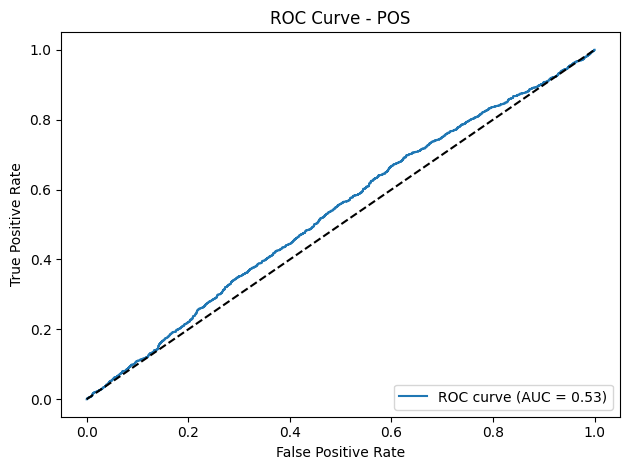

Saved ROC curve to saved_models/POS_CV_ROC_curve.png


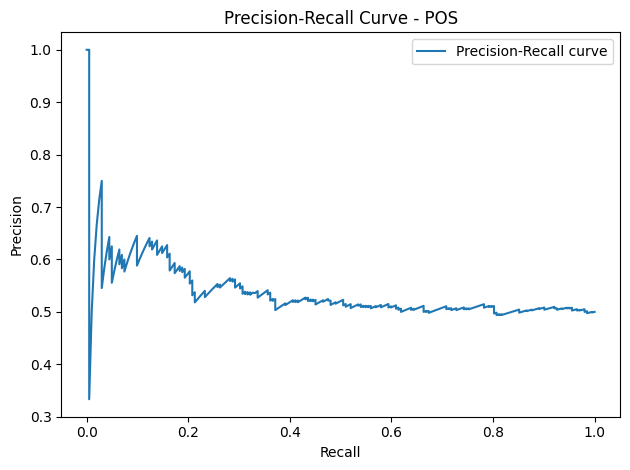

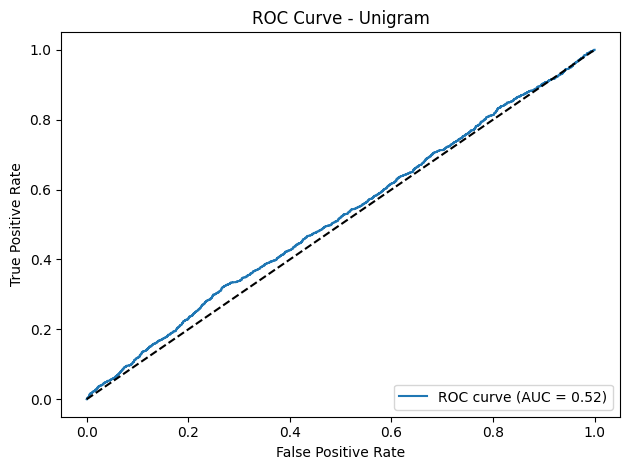

Saved ROC curve to saved_models/Unigram_CV_ROC_curve.png


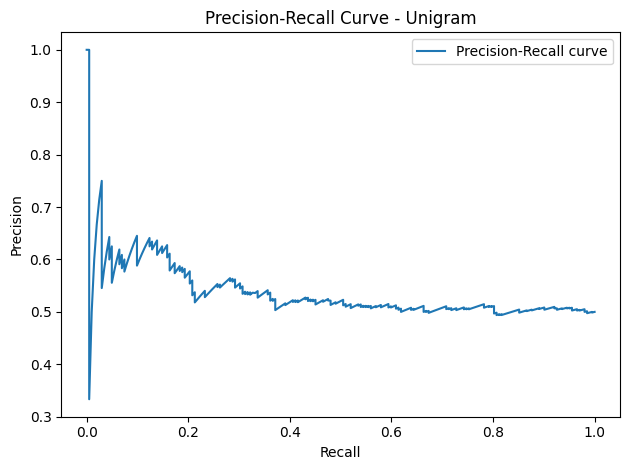

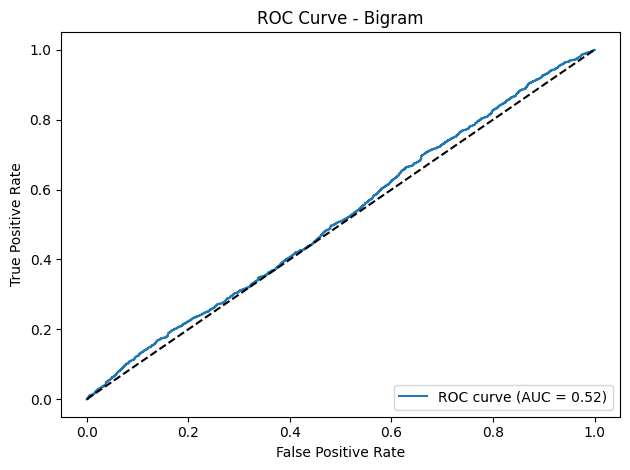

Saved ROC curve to saved_models/Bigram_CV_ROC_curve.png


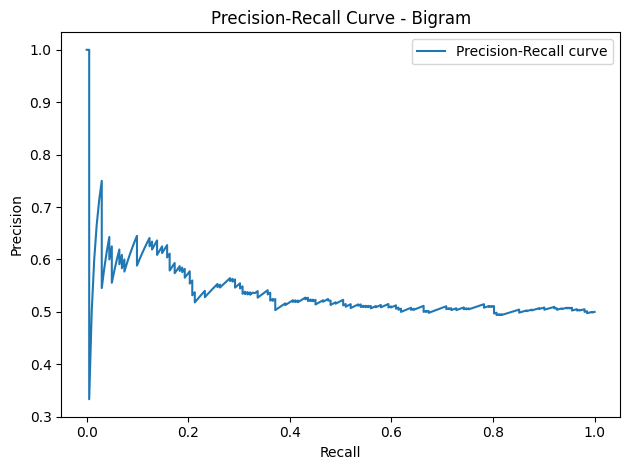

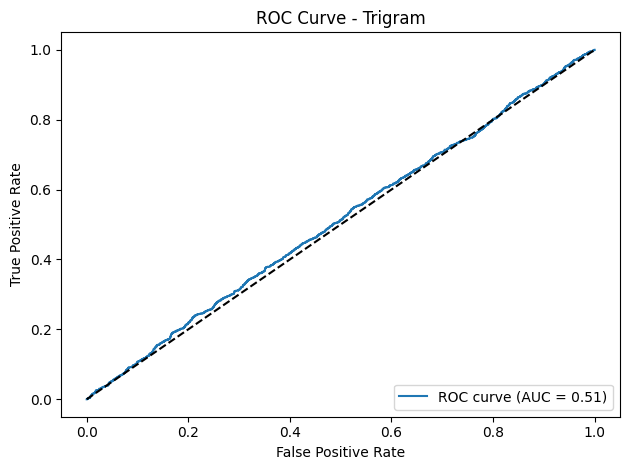

Saved ROC curve to saved_models/Trigram_CV_ROC_curve.png


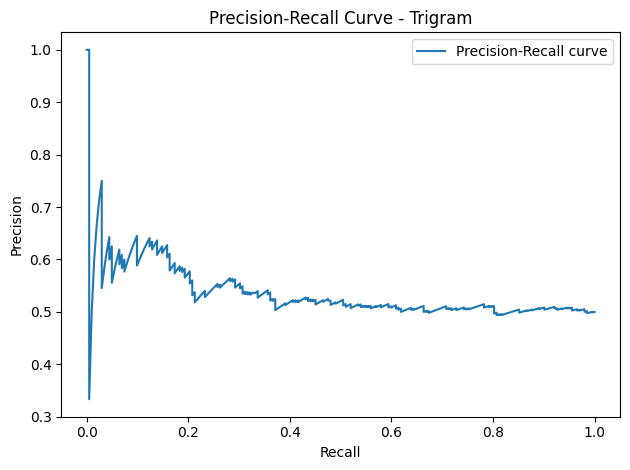

In [ ]:
# Plot ROC for each embedding type
for name, (y_true, y_probs) in roc_data.items():
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.tight_layout()

    roc_path = os.path.join(save_dir, f"{name}_CV_ROC_curve.png")
    plt.savefig(roc_path)
    plt.show()
    print(f"Saved ROC curve to {roc_path}")

    precision, recall, _ = precision_recall_curve(y_te, probs)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_precision_recall_curve.png"))
    plt.show()

In [ ]:
print("\n=== 10-Fold Cross Validation with SVM  ===")
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = {}

for name, (ug, st) in embedding_experiments.items():
    # Prepare input features and labels
    pipe, X_df, y = make_embedding_pipeline_svm(ug, st)

    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    all_preds = []
    all_true = []
    fold_accuracies = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_df, y)):
        X_train, X_val = X_df.iloc[train_idx], X_df.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        fold_model = Pipeline([
            ('stack', FunctionTransformer(stack_feats, validate=False)),
            ('clf', SVC(kernel='linear', class_weight='balanced', probability=True))
        ])
        fold_model.fit(X_train, y_train)
        preds = fold_model.predict(X_val)

        all_preds.extend(preds)
        all_true.extend(y_val)

        # Metrics per fold
        acc = accuracy_score(y_val, preds)
        prec = precision_score(y_val, preds, average='binary', zero_division=0)
        rec = recall_score(y_val, preds, average='binary', zero_division=0)
        f1 = f1_score(y_val, preds, average='binary', zero_division=0)

        fold_accuracies.append(acc)
        fold_precisions.append(prec)
        fold_recalls.append(rec)
        fold_f1s.append(f1)

    # Mean and Std for each metric
    mean_acc, std_acc = np.mean(fold_accuracies), np.std(fold_accuracies)
    mean_prec, std_prec = np.mean(fold_precisions), np.std(fold_precisions)
    mean_rec, std_rec = np.mean(fold_recalls), np.std(fold_recalls)
    mean_f1, std_f1 = np.mean(fold_f1s), np.std(fold_f1s)

    # Print summary in desired format
    print(f"{name} - CV Accuracy: {mean_acc:.4f} ± {std_acc:.4f} | "
          f"Precision: {mean_prec:.4f} ± {std_prec:.4f} | "
          f"Recall: {mean_rec:.4f} ± {std_rec:.4f} | "
          f"F1: {mean_f1:.4f} ± {std_f1:.4f}")

    # Save the final model trained on the entire dataset
    pipe.fit(X_df, y)
    model_path = os.path.join(save_dir, f"{name}_CV_svm_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved final CV model to {model_path}")


=== 10-Fold Cross Validation with SVM  ===
POS - CV Accuracy: 0.5347 ± 0.0286 | Precision: 0.5303 ± 0.0252 | Recall: 0.6154 ± 0.0290 | F1: 0.5695 ± 0.0246
Saved final CV model to saved_models/POS_CV_svm_pipeline.pkl
Unigram - CV Accuracy: 0.5139 ± 0.0265 | Precision: 0.5136 ± 0.0258 | Recall: 0.5481 ± 0.0434 | F1: 0.5295 ± 0.0280
Saved final CV model to saved_models/Unigram_CV_svm_pipeline.pkl
Bigram - CV Accuracy: 0.5010 ± 0.0213 | Precision: 0.4012 ± 0.2017 | Recall: 0.5173 ± 0.4453 | F1: 0.3800 ± 0.3008
Saved final CV model to saved_models/Bigram_CV_svm_pipeline.pkl
Trigram - CV Accuracy: 0.4941 ± 0.0092 | Precision: 0.3567 ± 0.1882 | Recall: 0.3074 ± 0.3817 | F1: 0.2599 ± 0.2598
Saved final CV model to saved_models/Trigram_CV_svm_pipeline.pkl


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import os
import joblib

# 10-fold stratified CV splitter
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# SVM hyperparameter grid
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale'],  # 'gamma' only for 'rbf', ignored for 'linear'
}

print("\n=== 10-Fold Grid Search CV for SVM ===")
for name, (ug, st) in embedding_experiments.items():
    # rebuild the pipeline and data
    pipe, X_df, y = make_embedding_pipeline_svm(ug, st)

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=cv_outer,
        scoring="accuracy",
        n_jobs=-1,
        verbose=2
    )
    grid.fit(X_df, y)

    # report best parameters and score
    print(f"\n{name} best params: {grid.best_params_}")
    print(f"{name} best CV accuracy: {grid.best_score_:.4f}")

    # save the tuned pipeline
    best_path = os.path.join(save_dir, f"{name}_svm_grid_pipeline.pkl")
    joblib.dump(grid.best_estimator_, best_path)
    print(f"Saved best SVM pipeline to {best_path}")



=== 10-Fold Grid Search CV for SVM ===
Fitting 10 folds for each of 6 candidates, totalling 60 fits

POS best params: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
POS best CV accuracy: 0.5533
Saved best SVM pipeline to saved_models/POS_svm_grid_pipeline.pkl
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Unigram best params: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Unigram best CV accuracy: 0.5389
Saved best SVM pipeline to saved_models/Unigram_svm_grid_pipeline.pkl
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Bigram best params: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Bigram best CV accuracy: 0.5040
Saved best SVM pipeline to saved_models/Bigram_svm_grid_pipeline.pkl
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Trigram best params: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Trigram best CV accuracy: 0.4963
Saved best SVM pipeline to saved_models/Trigram_svm_grid

In [ ]:
loaded_pipelines = {}
save_dir = "saved_models"
for name in embedding_experiments.keys():
    model_variants = {}
    # Load train/test model
    path_train = os.path.join(save_dir, f"{name}_svm_pipeline.pkl")
    if os.path.isfile(path_train):
        model_variants['train'] = joblib.load(path_train)
        print(f"Loaded SVM train model: {name}")
    # Load cross-validation (CV) model
    path_cv = os.path.join(save_dir, f"{name}_CV_svm_pipeline.pkl")
    if os.path.isfile(path_cv):
        model_variants['cv'] = joblib.load(path_cv)
        print(f"Loaded SVM CV model: {name}")
    # Only add to loaded_pipelines if at least one model variant is found
    if model_variants:
        loaded_pipelines[name] = model_variants
    else:
        print(f"No models found for: {name}")

Loaded SVM train model: POS
Loaded SVM CV model: POS
Loaded SVM train model: Unigram
Loaded SVM CV model: Unigram
Loaded SVM train model: Bigram
Loaded SVM CV model: Bigram
Loaded SVM train model: Trigram
Loaded SVM CV model: Trigram


In [ ]:
def get_pos_features(sentence):
    return np.random.rand(50)

def get_unigram_features(sentence):
    return np.random.rand(100)

def get_bigram_features(sentence):
    return np.random.rand(50)

def get_trigram_features(sentence):
    return np.random.rand(50)

def extract_features_for_models(sentence):
    features = {}

    features['POS'] = get_pos_features(sentence)
    features['Unigram'] = get_unigram_features(sentence)
    features['Bigram'] = get_bigram_features(sentence)
    features['Trigram'] = get_trigram_features(sentence)

    return features

def predict_sentence(sentence, pipelines):
    feats_dict = extract_features_for_models(sentence)
    print(f"Input sentence: {sentence}\n")

    for model_name, model_variants in pipelines.items():
        X_test_df = pd.DataFrame({'feat': [feats_dict[model_name]]})

        # Predict using train/test model
        if 'train' in model_variants:
            pred = model_variants['train'].predict(X_test_df)[0]
            prob = model_variants['train'].predict_proba(X_test_df)[0][1]
            print(f"{model_name} (train): {'Correct' if pred == 1 else 'Incorrect'} (confidence: {prob:.2f})")

        # Predict using CV model
        if 'cv' in model_variants:
            pred = model_variants['cv'].predict(X_test_df)[0]
            prob = model_variants['cv'].predict_proba(X_test_df)[0][1]
            print(f"{model_name} (CV): {'Correct' if pred == 1 else 'Incorrect'} (confidence: {prob:.2f})")


# Example usage:
sentence = input("Enter a sentence to check: ")
predict_sentence(sentence, loaded_pipelines)


Enter a sentence to check: she are running late
Input sentence: she are running late

POS (train): Correct (confidence: 1.00)
POS (CV): Correct (confidence: 1.00)
Unigram (train): Correct (confidence: 1.00)
Unigram (CV): Correct (confidence: 1.00)
Bigram (train): Incorrect (confidence: 0.50)
Bigram (CV): Incorrect (confidence: 0.83)
Trigram (train): Correct (confidence: 0.00)
Trigram (CV): Correct (confidence: 0.00)


# XGBoost

In [7]:
from xgboost import XGBClassifier

# Configuration
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# 0) Parse embeddings (handle both strings and arrays)
def parse_embedding(s):
    if isinstance(s, str):
        return np.array([float(x) for x in s.strip("[]").split()], dtype=float)
    elif isinstance(s, (list, np.ndarray)):
        return np.array(s, dtype=float)
    else:
        return np.zeros(0, dtype=float)

for ug_col, st_col in embedding_experiments.values():
    df[ug_col] = df[ug_col].apply(parse_embedding)
    df[st_col] = df[st_col].apply(parse_embedding)

# Helper to stack feature arrays
def stack_feats(X):
    return np.vstack(X["feat"])

# Pipeline builder for XGBoost
def make_embedding_pipeline_xgb(ug_col, st_col):
    n     = len(df)
    feats = list(df[ug_col]) + list(df[st_col])
    y     = np.array([0]*n + [1]*n)
    X_df  = pd.DataFrame({"feat": feats})

    stacker = FunctionTransformer(stack_feats, validate=False)
    pipe    = Pipeline([
        ("stack", stacker),
        ("clf",   XGBClassifier(eval_metric="logloss", random_state=42))
    ])
    return pipe, X_df, y

# 2) 90/10 Train/Test Split
print("=== Train/Test split 90/10 with XGBoost ===")
for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_xgb(ug, st)
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_df, y, test_size=0.1, stratify=y, random_state=42
    )

    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_te)

    print(f"\n{name} accuracy: {accuracy_score(y_te, preds):.4f}")
    print(classification_report(y_te, preds, digits=4))

    # Save the pipeline
    model_path = os.path.join(save_dir, f"{name}_xgb_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved XGBoost pipeline to {model_path}")


=== Train/Test split 90/10 with XGBoost ===

POS accuracy: 0.4876
              precision    recall  f1-score   support

           0     0.4885    0.5248    0.5060       202
           1     0.4866    0.4505    0.4679       202

    accuracy                         0.4876       404
   macro avg     0.4876    0.4876    0.4869       404
weighted avg     0.4876    0.4876    0.4869       404

Saved XGBoost pipeline to saved_models/POS_xgb_pipeline.pkl

Unigram accuracy: 0.4629
              precision    recall  f1-score   support

           0     0.4590    0.4158    0.4364       202
           1     0.4661    0.5099    0.4870       202

    accuracy                         0.4629       404
   macro avg     0.4625    0.4629    0.4617       404
weighted avg     0.4625    0.4629    0.4617       404

Saved XGBoost pipeline to saved_models/Unigram_xgb_pipeline.pkl

Bigram accuracy: 0.4307
              precision    recall  f1-score   support

           0     0.4346    0.4604    0.4471       


=== Visualizations for XGBoost Models ===

--- Visualization for POS (XGBoost) ---


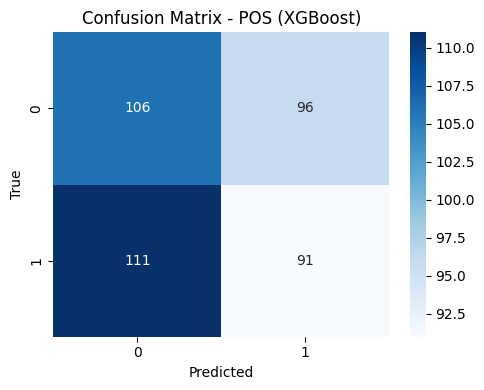

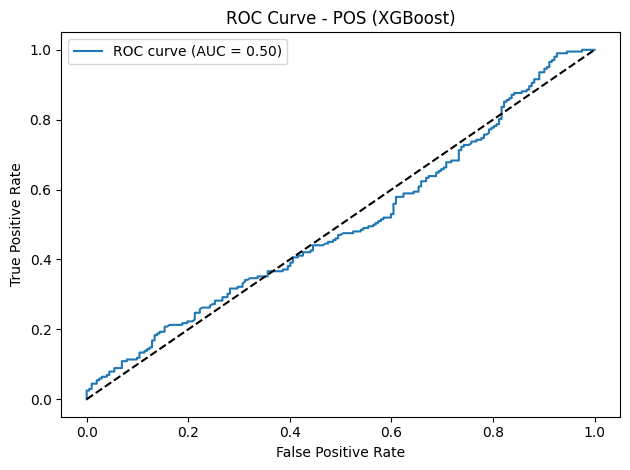

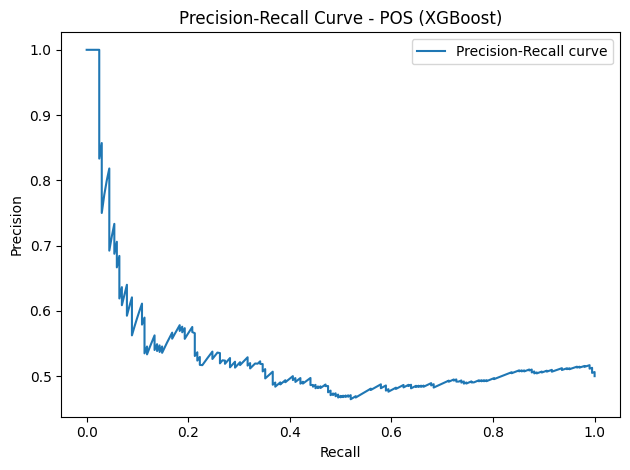


--- Visualization for Unigram (XGBoost) ---


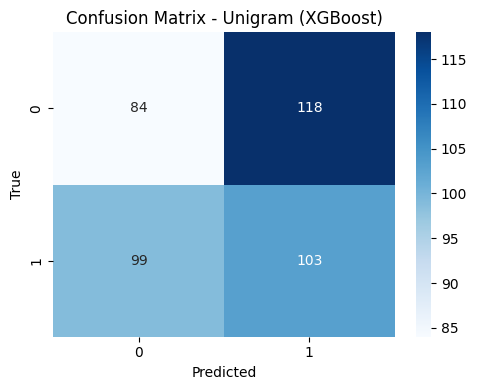

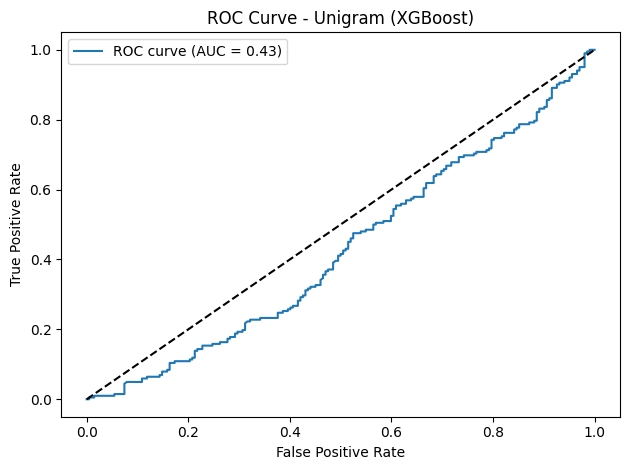

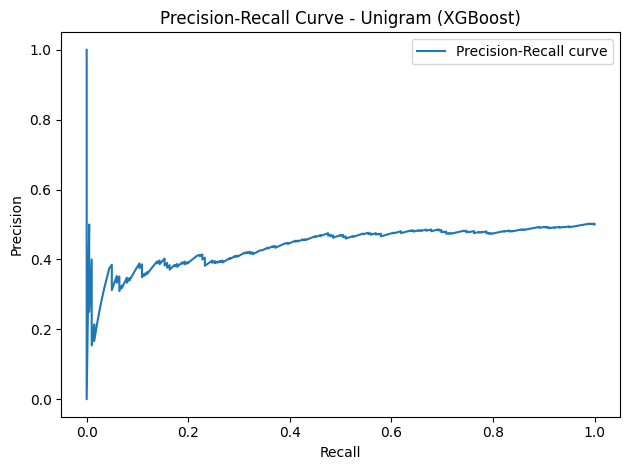


--- Visualization for Bigram (XGBoost) ---


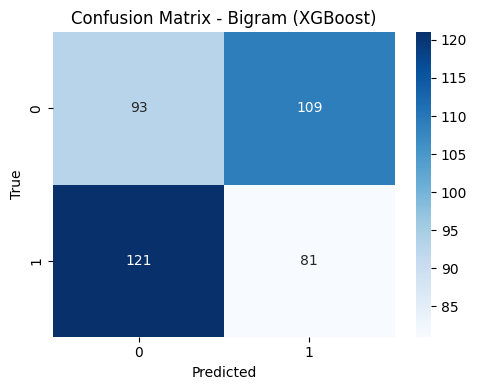

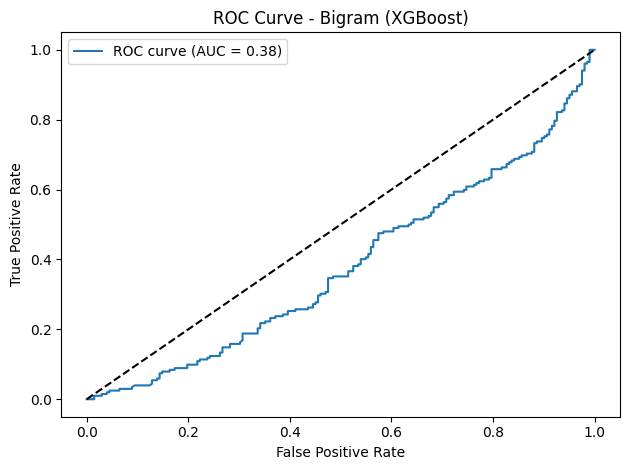

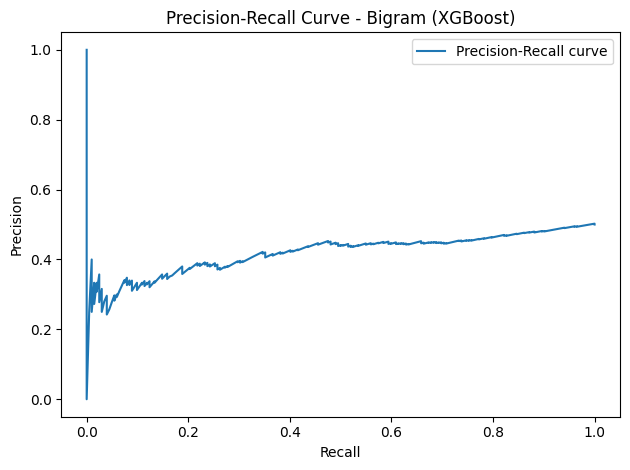


--- Visualization for Trigram (XGBoost) ---


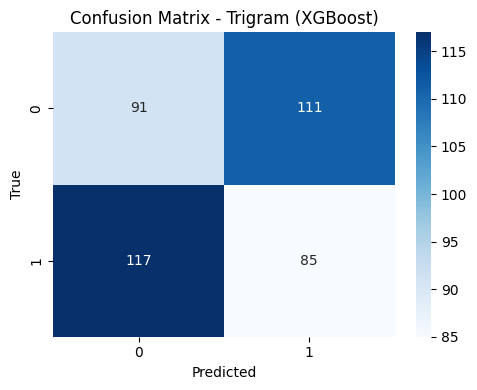

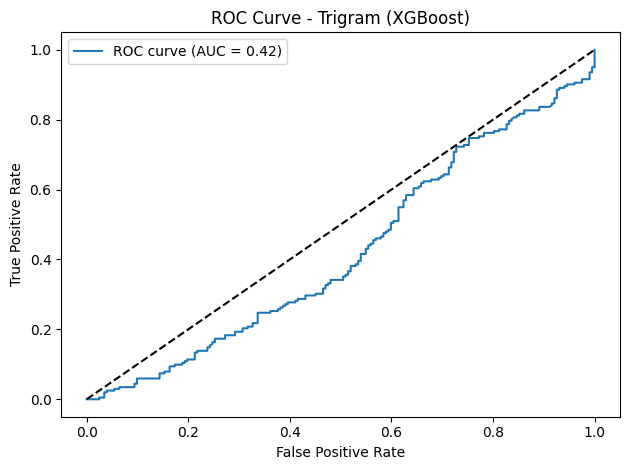

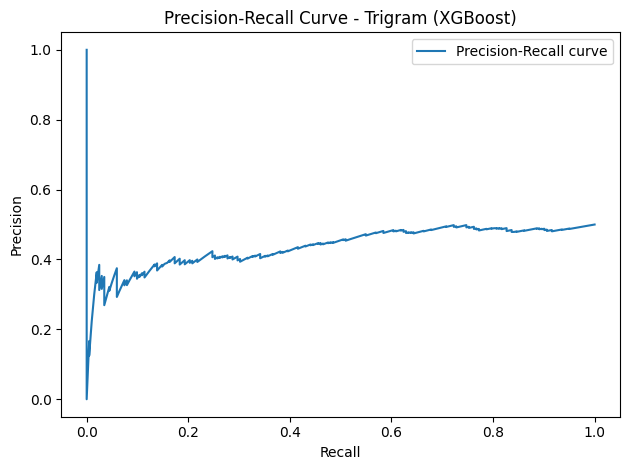

In [8]:
embedding_types = ['POS', 'Unigram', 'Bigram', 'Trigram']

print("\n=== Visualizations for XGBoost Models ===")

for name in embedding_types:
    print(f"\n--- Visualization for {name} (XGBoost) ---")

    # Load model
    model_path = os.path.join(save_dir, f"{name}_xgb_pipeline.pkl")
    pipe = joblib.load(model_path)

    # Rebuild data
    ug_col, st_col = embedding_experiments[name]
    pipe_, X_df, y = make_embedding_pipeline_xgb(ug_col, st_col)

    # 10% test split for visualizations
    _, X_te, _, y_te = train_test_split(X_df, y, test_size=0.1, stratify=y, random_state=42)
    preds = pipe.predict(X_te)
    probs = pipe.predict_proba(X_te)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_te, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} (XGBoost)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_confusion_matrix.png"))
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_te, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name} (XGBoost)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_roc_curve.png"))
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_te, probs)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name} (XGBoost)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_precision_recall_curve.png"))
    plt.show()

In [10]:
import os
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

# 10-fold stratified CV splitter
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    "clf__n_estimators":  [50, 100, 200],
    "clf__max_depth":     [3, 4, 5],
    "clf__learning_rate": [0.01, 0.05, 0.1]
}

# Specify multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

print("\n=== 10-Fold Grid Search CV for XGBoost ===")
for name, (ug, st) in embedding_experiments.items():
    # rebuild the pipeline and data
    pipe, X_df, y = make_embedding_pipeline_xgb(ug, st)

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        # Pass the list of scoring metrics
        scoring=scoring,
        # Refit on the best performing metric (e.g., accuracy)
        refit='accuracy',
        cv=cv_outer,
        n_jobs=-1,
        verbose=2
    )
    grid.fit(X_df, y)

    # report - Access the metrics from the grid.cv_results_
    print(f"\n{name} - CV + GridSearch Accuracy: {grid.cv_results_['mean_test_accuracy'][grid.best_index_]:.4f} ± {grid.cv_results_['std_test_accuracy'][grid.best_index_]:.4f} | Precision: {grid.cv_results_['mean_test_precision'][grid.best_index_]:.4f} ± {grid.cv_results_['std_test_precision'][grid.best_index_]:.4f} | Recall: {grid.cv_results_['mean_test_recall'][grid.best_index_]:.4f} ± {grid.cv_results_['std_test_recall'][grid.best_index_]:.4f} | F1: {grid.cv_results_['mean_test_f1'][grid.best_index_]:.4f} ± {grid.cv_results_['std_test_f1'][grid.best_index_]:.4f}")

    # save the tuned pipeline
    # Use the previously defined save_dir variable
    # save_dir = "path_to_save_directory"  # Remove or comment out this line
    best_path = os.path.join(save_dir, f"{name}_xgb_grid_pipeline.pkl")
    joblib.dump(grid.best_estimator_, best_path)
    print(f"Saved best XGBoost pipeline to {best_path}")


=== 10-Fold Grid Search CV for XGBoost ===
Fitting 10 folds for each of 27 candidates, totalling 270 fits

POS - CV + GridSearch Accuracy: 0.5414 ± 0.0290 | Precision: 0.5351 ± 0.0250 | Recall: 0.6457 ± 0.0281 | F1: 0.5848 ± 0.0209
Saved best XGBoost pipeline to saved_models/POS_xgb_grid_pipeline.pkl
Fitting 10 folds for each of 27 candidates, totalling 270 fits

Unigram - CV + GridSearch Accuracy: 0.5161 ± 0.0150 | Precision: 0.5190 ± 0.0172 | Recall: 0.4445 ± 0.0669 | F1: 0.4763 ± 0.0398
Saved best XGBoost pipeline to saved_models/Unigram_xgb_grid_pipeline.pkl
Fitting 10 folds for each of 27 candidates, totalling 270 fits

Bigram - CV + GridSearch Accuracy: 0.4757 ± 0.0239 | Precision: 0.4740 ± 0.0254 | Recall: 0.4272 ± 0.0266 | F1: 0.4488 ± 0.0213
Saved best XGBoost pipeline to saved_models/Bigram_xgb_grid_pipeline.pkl
Fitting 10 folds for each of 27 candidates, totalling 270 fits

Trigram - CV + GridSearch Accuracy: 0.5089 ± 0.0262 | Precision: 0.5153 ± 0.0433 | Recall: 0.3157 ± 0


=== Visualizations for Grid-Tuned XGBoost Models ===

--- Visualization for POS (XGBoost Grid Search) ---


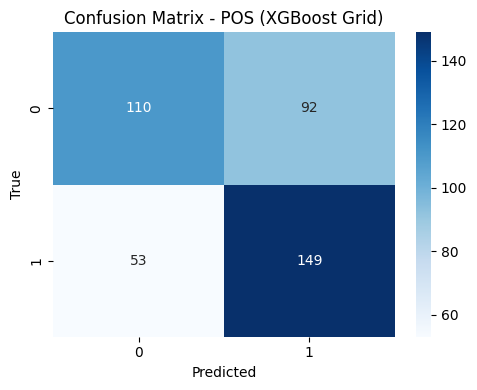

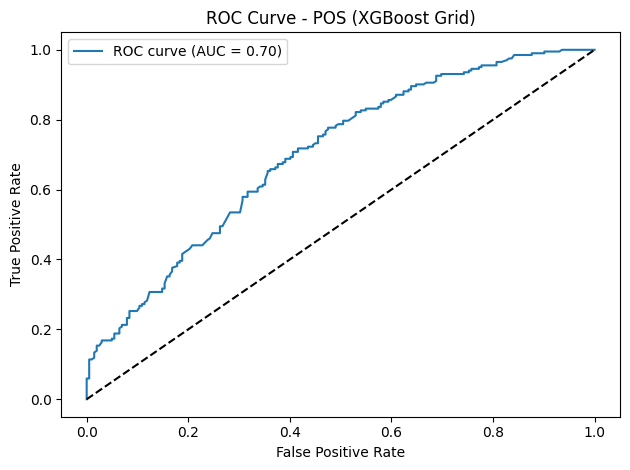

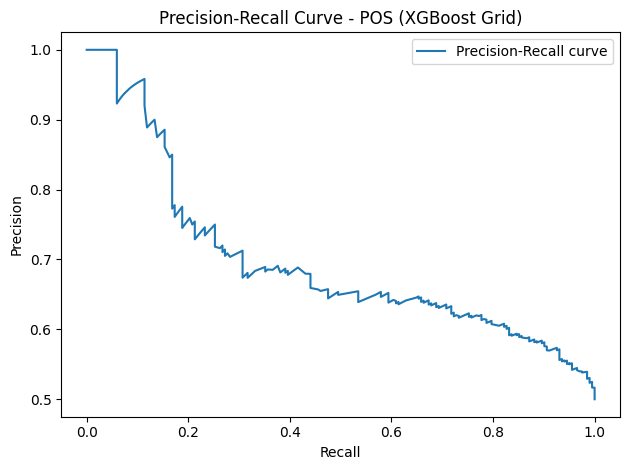


--- Visualization for Unigram (XGBoost Grid Search) ---


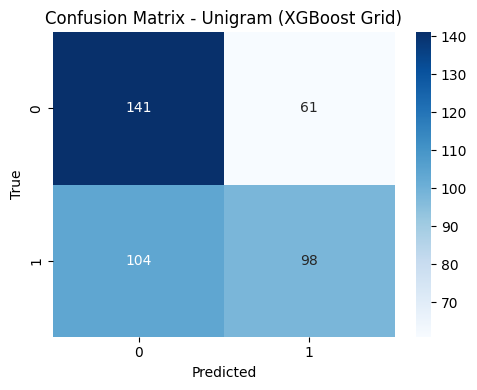

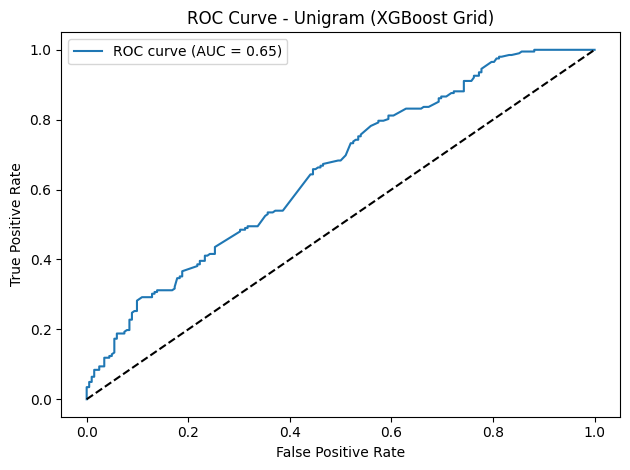

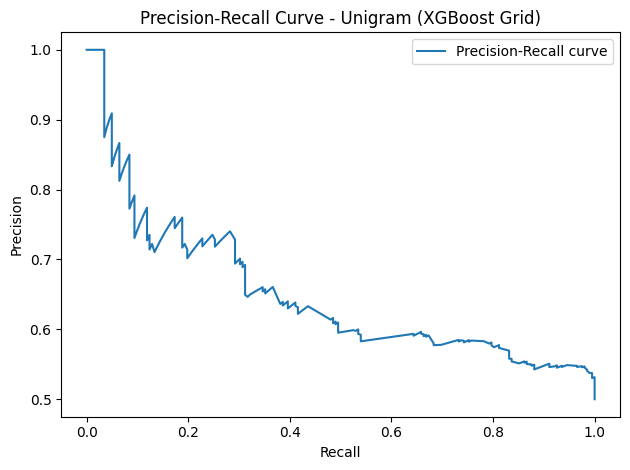


--- Visualization for Bigram (XGBoost Grid Search) ---


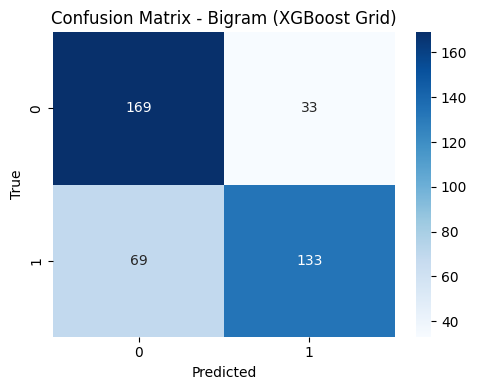

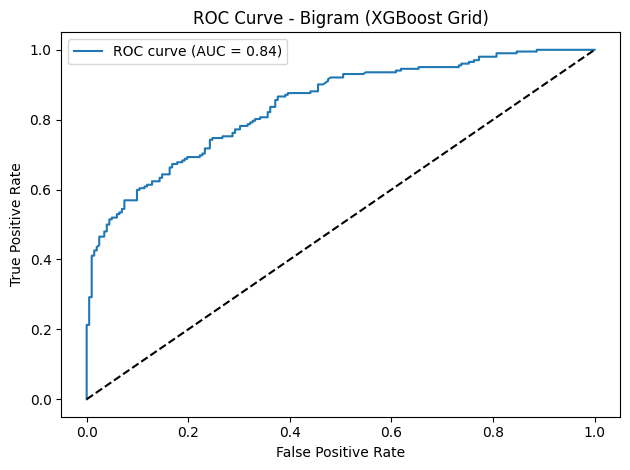

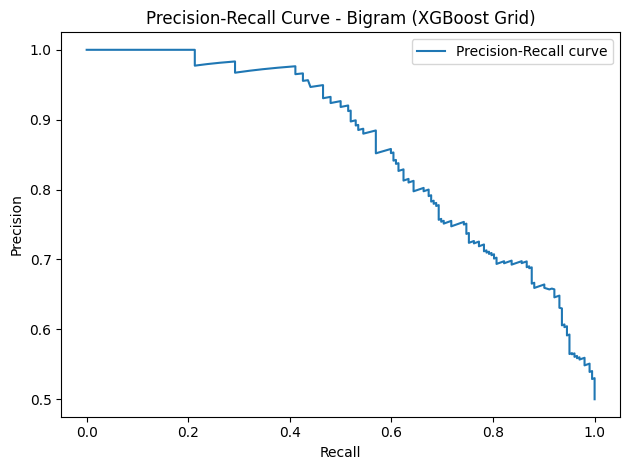


--- Visualization for Trigram (XGBoost Grid Search) ---


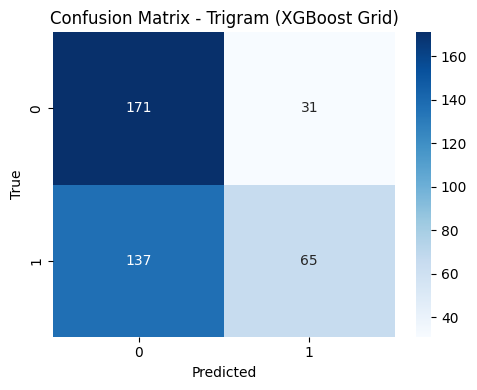

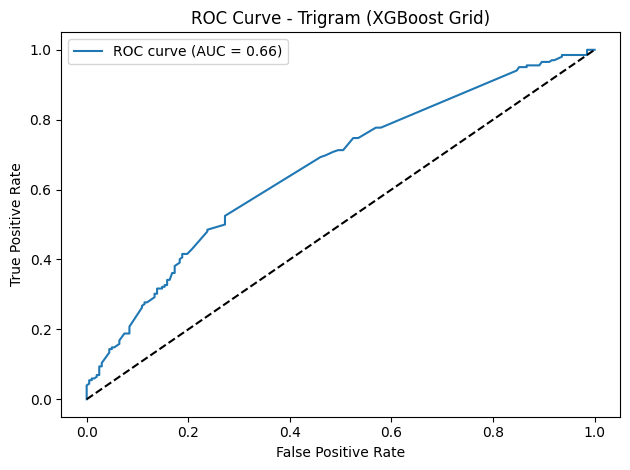

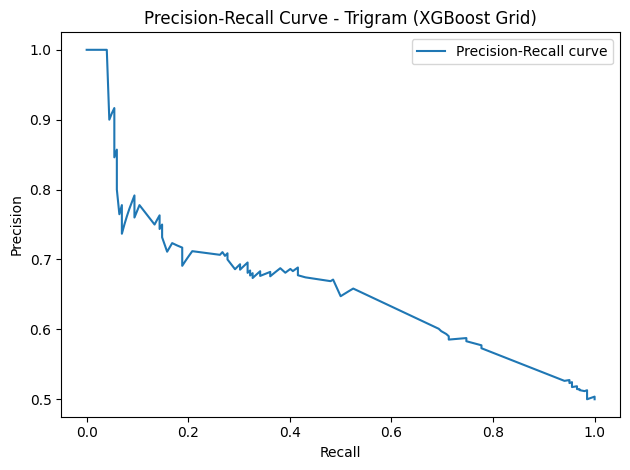

In [11]:
embedding_types = ['POS', 'Unigram', 'Bigram', 'Trigram']

print("\n=== Visualizations for Grid-Tuned XGBoost Models ===")

for name in embedding_types:
    print(f"\n--- Visualization for {name} (XGBoost Grid Search) ---")

    # Load the best model from grid search
    model_path = os.path.join(save_dir, f"{name}_xgb_grid_pipeline.pkl")
    pipe = joblib.load(model_path)

    # Rebuild the dataset
    ug_col, st_col = embedding_experiments[name]
    _, X_df, y = make_embedding_pipeline_xgb(ug_col, st_col)

    # Split 10% for visualization testing
    _, X_te, _, y_te = train_test_split(X_df, y, test_size=0.1, stratify=y, random_state=42)
    preds = pipe.predict(X_te)
    probs = pipe.predict_proba(X_te)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_te, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} (XGBoost Grid)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_grid_confusion_matrix.png"))
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_te, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name} (XGBoost Grid)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_grid_roc_curve.png"))
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_te, probs)
    plt.figure()
    plt.plot(recall, precision, label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name} (XGBoost Grid)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{name}_xgb_grid_precision_recall_curve.png"))
    plt.show()

In [ ]:
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)
loaded_xgb = {}
for name in embedding_experiments.keys():
    variants = {}
    p_train = os.path.join(save_dir, f"{name}_xgb_pipeline.pkl")
    p_grid  = os.path.join(save_dir, f"{name}_xgb_grid_pipeline.pkl")
    try:
        if os.path.exists(p_train):
            variants['train'] = joblib.load(p_train)
            print(f"Loaded XGB train model for: {name}")
        if os.path.exists(p_grid):
            variants['grid'] = joblib.load(p_grid)
            print(f"Loaded XGB grid model for: {name}")
    except Exception as e:
        print(f"Error loading model for {name}: {e}")
    if variants:
        loaded_xgb[name] = variants
if not loaded_xgb:
    print("No XGBoost pipelines were loaded.")
else:
    print(f"\n Total loaded XGB model groups: {len(loaded_xgb)}")

Loaded XGB train model for: POS
Loaded XGB grid model for: POS
Loaded XGB train model for: Unigram
Loaded XGB grid model for: Unigram
Loaded XGB train model for: Bigram
Loaded XGB grid model for: Bigram
Loaded XGB train model for: Trigram
Loaded XGB grid model for: Trigram

 Total loaded XGB model groups: 4


In [ ]:
# Stub feature-extractor functions
def get_pos_features(sentence):
    return np.random.rand(50)
def get_unigram_features(sentence):
    return np.random.rand(100)
def get_bigram_features(sentence):
    return np.random.rand(50)
def get_trigram_features(sentence):
    return np.random.rand(50)

def extract_features_for_models(sentence):
    return {
        'POS':     get_pos_features(sentence),
        'Unigram': get_unigram_features(sentence),
        'Bigram':  get_bigram_features(sentence),
        'Trigram': get_trigram_features(sentence)
    }

# Prediction function for XGB only
def predict_with_xgb(sentence, xgb_pipelines):
    feats = extract_features_for_models(sentence)
    print(f"\nInput sentence: {sentence}\n")
    for name, variants in xgb_pipelines.items():
        # Get the correct feature vector
        if name not in feats:
            print(f"Warning: No features extracted for {name}. Skipping.")
            continue

        df_feat = pd.DataFrame({'feat': [feats[name]]})

        for tag, model in variants.items():
            try:
                pred = model.predict(df_feat)[0]
                prob = model.predict_proba(df_feat)[0][1]  # probability for class '1'
                label = "Correct" if pred == 1 else "Incorrect"
                print(f"{name} XGB ({tag}): {label} (confidence: {prob:.2f})")
            except Exception as e:
                print(f"Error predicting with {name} XGB ({tag}): {e}")


# Test on an example
sentence = input("Enter a sentence to check:\n> ")
predict_with_xgb(sentence, loaded_xgb)

Enter a sentence to check:
> she are running late

Input sentence: she are running late

POS XGB (train): Incorrect (confidence: 0.24)
POS XGB (grid): Incorrect (confidence: 0.42)
Unigram XGB (train): Incorrect (confidence: 0.15)
Unigram XGB (grid): Incorrect (confidence: 0.39)
Bigram XGB (train): Incorrect (confidence: 0.23)
Bigram XGB (grid): Incorrect (confidence: 0.50)
Trigram XGB (train): Incorrect (confidence: 0.47)
Trigram XGB (grid): Correct (confidence: 0.54)


#KNN

##KNN train test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import os
import joblib

# Make directory to save models
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

def stack_feats(X):
    return np.vstack(X['feat'])

def make_embedding_pipeline_knn(ug_col, st_col, n_neighbors=5):
    n = len(df)
    feats = list(df[ug_col]) + list(df[st_col])
    y     = np.array([0]*n + [1]*n)  # 0=ungrammatical, 1=correct
    X_df  = pd.DataFrame({'feat': feats})
    stacker = FunctionTransformer(stack_feats, validate=False)

    pipe = Pipeline([
        ('stack', stacker),
        ('scaler', StandardScaler()),  # Scaling is important for KNN
        ('clf',   KNeighborsClassifier(n_neighbors=n_neighbors))
    ])
    return pipe, X_df, y

trained_pipelines = {}
print("=== Train/Test split 90/10 with KNN ===")
for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_knn(ug, st)

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_df, y,
        test_size=0.1,
        stratify=y,
        random_state=42
    )
    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_te)
    trained_pipelines[name] = pipe

    print(f"\n{name} accuracy: {accuracy_score(y_te, preds):.4f}")
    print(classification_report(y_te, preds, digits=4))

    # Save model
    model_path = os.path.join(save_dir, f"{name}_knn_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved model to {model_path}")


=== Train/Test split 90/10 with KNN ===

POS accuracy: 0.5149
              precision    recall  f1-score   support

           0     0.5143    0.5347    0.5243       202
           1     0.5155    0.4950    0.5051       202

    accuracy                         0.5149       404
   macro avg     0.5149    0.5149    0.5147       404
weighted avg     0.5149    0.5149    0.5147       404

Saved model to saved_models/POS_knn_pipeline.pkl

Unigram accuracy: 0.4802
              precision    recall  f1-score   support

           0     0.4813    0.5099    0.4952       202
           1     0.4789    0.4505    0.4643       202

    accuracy                         0.4802       404
   macro avg     0.4801    0.4802    0.4797       404
weighted avg     0.4801    0.4802    0.4797       404

Saved model to saved_models/Unigram_knn_pipeline.pkl

Bigram accuracy: 0.4109
              precision    recall  f1-score   support

           0     0.4167    0.4455    0.4306       202
           1     0.404

## KNN Cross Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n=== 10-Fold Cross Validation with KNN ===")
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results_knn = {}

for name, (ug, st) in embedding_experiments.items():
    # Prepare input features and labels
    pipe, X_df, y = make_embedding_pipeline_knn(ug, st)

    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    all_preds = []
    all_true = []
    fold_accuracies = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_df, y)):
        X_train, X_val = X_df.iloc[train_idx], X_df.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        fold_model = Pipeline([
            ('stack', FunctionTransformer(stack_feats, validate=False)),
            ('scaler', StandardScaler()),
            ('clf', KNeighborsClassifier(n_neighbors=5))  # You can tune this
        ])
        fold_model.fit(X_train, y_train)
        preds = fold_model.predict(X_val)

        all_preds.extend(preds)
        all_true.extend(y_val)

        # Metrics per fold
        acc = accuracy_score(y_val, preds)
        prec = precision_score(y_val, preds, average='binary', zero_division=0)
        rec = recall_score(y_val, preds, average='binary', zero_division=0)
        f1 = f1_score(y_val, preds, average='binary', zero_division=0)

        fold_accuracies.append(acc)
        fold_precisions.append(prec)
        fold_recalls.append(rec)
        fold_f1s.append(f1)

    # Mean and Std for each metric
    mean_acc, std_acc = np.mean(fold_accuracies), np.std(fold_accuracies)
    mean_prec, std_prec = np.mean(fold_precisions), np.std(fold_precisions)
    mean_rec, std_rec = np.mean(fold_recalls), np.std(fold_recalls)
    mean_f1, std_f1 = np.mean(fold_f1s), np.std(fold_f1s)

    # Print summary in desired format
    print(f"{name} - CV Accuracy: {mean_acc:.4f} ± {std_acc:.4f} | "
          f"Precision: {mean_prec:.4f} ± {std_prec:.4f} | "
          f"Recall: {mean_rec:.4f} ± {std_rec:.4f} | "
          f"F1: {mean_f1:.4f} ± {std_f1:.4f}")

    # Save the final model trained on the entire dataset
    pipe.fit(X_df, y)
    model_path = os.path.join(save_dir, f"{name}_CV_knn_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved final CV model to {model_path}")



=== 10-Fold Cross Validation with KNN ===
POS - CV Accuracy: 0.4871 ± 0.0180 | Precision: 0.4870 ± 0.0190 | Recall: 0.4663 ± 0.0274 | F1: 0.4760 ± 0.0184
Saved final CV model to saved_models/POS_CV_knn_pipeline.pkl
Unigram - CV Accuracy: 0.4591 ± 0.0277 | Precision: 0.4593 ± 0.0274 | Recall: 0.4598 ± 0.0311 | F1: 0.4594 ± 0.0277
Saved final CV model to saved_models/Unigram_CV_knn_pipeline.pkl
Bigram - CV Accuracy: 0.3957 ± 0.0183 | Precision: 0.3922 ± 0.0192 | Recall: 0.3801 ± 0.0253 | F1: 0.3859 ± 0.0214
Saved final CV model to saved_models/Bigram_CV_knn_pipeline.pkl
Trigram - CV Accuracy: 0.3940 ± 0.0349 | Precision: 0.3874 ± 0.0320 | Recall: 0.3617 ± 0.0399 | F1: 0.3733 ± 0.0330
Saved final CV model to saved_models/Trigram_CV_knn_pipeline.pkl


In [ ]:
# Dictionary to store loaded KNN pipelines
loaded_knn = {}
save_dir = "saved_models"

for name in embedding_experiments.keys():
    model_variants = {}

    # Load train/test KNN model
    path_train = os.path.join(save_dir, f"{name}_knn_pipeline.pkl")
    if os.path.isfile(path_train):
        model_variants['train'] = joblib.load(path_train)
        print(f"Loaded KNN train model: {name}")

    # Load CV KNN model
    path_cv = os.path.join(save_dir, f"{name}_CV_knn_pipeline.pkl")
    if os.path.isfile(path_cv):
        model_variants['cv'] = joblib.load(path_cv)
        print(f"Loaded KNN CV model: {name}")

    if model_variants:
        loaded_knn[name] = model_variants
    else:
        print(f"No KNN models found for: {name}")

Loaded KNN train model: POS
Loaded KNN CV model: POS
Loaded KNN train model: Unigram
Loaded KNN CV model: Unigram
Loaded KNN train model: Bigram
Loaded KNN CV model: Bigram
Loaded KNN train model: Trigram
Loaded KNN CV model: Trigram


In [ ]:
# Stub feature extraction
def get_pos_features(sentence): return np.random.rand(50)
def get_unigram_features(sentence): return np.random.rand(100)
def get_bigram_features(sentence): return np.random.rand(50)
def get_trigram_features(sentence): return np.random.rand(50)

def extract_features_for_models(sentence):
    return {
        'POS': get_pos_features(sentence),
        'Unigram': get_unigram_features(sentence),
        'Bigram': get_bigram_features(sentence),
        'Trigram': get_trigram_features(sentence)
    }

def predict_with_knn(sentence, knn_pipelines):
    feats = extract_features_for_models(sentence)
    print(f"\nInput sentence: {sentence}\n")

    for name, models in knn_pipelines.items():
        X_test_df = pd.DataFrame({'feat': [feats[name]]})  # Fix: put vector in 'feat' column
        if 'train' in models:
            pred = models['train'].predict(X_test_df)[0]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} KNN (train): {label}")

        if 'cv' in models:
            pred = models['cv'].predict(X_test_df)[0]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} KNN (CV): {label}")

sentence = input("Enter a sentence to test KNN: ")
predict_with_knn(sentence, loaded_knn)

Enter a sentence to test KNN: she is running late

Input sentence: she is running late

POS KNN (train): Correct
POS KNN (CV): Correct
Unigram KNN (train): Correct
Unigram KNN (CV): Correct
Bigram KNN (train): Incorrect
Bigram KNN (CV): Incorrect
Trigram KNN (train): Incorrect
Trigram KNN (CV): Incorrect


#Random Forest


## Random forest train test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

def stack_feats(X):
    return np.vstack(X['feat'])

def make_embedding_pipeline_rf(ug_col, st_col, n_estimators=100, random_state=42):
    n = len(df)
    feats = list(df[ug_col]) + list(df[st_col])
    y = np.array([0]*n + [1]*n)  # 0=ungrammatical, 1=correct
    X_df = pd.DataFrame({'feat': feats})
    stacker = FunctionTransformer(stack_feats, validate=False)

    pipe = Pipeline([
        ('stack', stacker),
        ('scaler', StandardScaler()),  # Scaling is optional for RF but can keep for consistency
        ('clf', RandomForestClassifier(n_estimators=n_estimators, random_state=random_state))
    ])
    return pipe, X_df, y

trained_pipelines_rf = {}
print("=== Train/Test split 90/10 with Random Forest ===")
for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_rf(ug, st)

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_df, y,
        test_size=0.1,
        stratify=y,
        random_state=42
    )
    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_te)
    trained_pipelines_rf[name] = pipe

    print(f"\n{name} accuracy: {accuracy_score(y_te, preds):.4f}")
    print(classification_report(y_te, preds, digits=4))

    # Save model
    model_path = os.path.join(save_dir, f"{name}_rf_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved model to {model_path}")

=== Train/Test split 90/10 with Random Forest ===

POS accuracy: 0.5223
              precision    recall  f1-score   support

           0     0.5198    0.5842    0.5501       202
           1     0.5254    0.4604    0.4908       202

    accuracy                         0.5223       404
   macro avg     0.5226    0.5223    0.5204       404
weighted avg     0.5226    0.5223    0.5204       404

Saved model to saved_models/POS_rf_pipeline.pkl

Unigram accuracy: 0.4480
              precision    recall  f1-score   support

           0     0.4467    0.4356    0.4411       202
           1     0.4493    0.4604    0.4548       202

    accuracy                         0.4480       404
   macro avg     0.4480    0.4480    0.4479       404
weighted avg     0.4480    0.4480    0.4479       404

Saved model to saved_models/Unigram_rf_pipeline.pkl

Bigram accuracy: 0.3738
              precision    recall  f1-score   support

           0     0.3679    0.3515    0.3595       202
           1  

## random forest cross validation

In [ ]:
print("\n=== 10-Fold Cross Validation with Random Forest ===")
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results_rf = {}

for name, (ug, st) in embedding_experiments.items():
    # Prepare input features and labels
    pipe, X_df, y = make_embedding_pipeline_rf(ug, st)

    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    fold_accuracies = []
    all_preds = []
    all_true = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_df, y), 1):
        X_train, X_val = X_df.iloc[train_idx], X_df.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        fold_model = Pipeline([
            ('stack', FunctionTransformer(stack_feats, validate=False)),
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
        ])
        fold_model.fit(X_train, y_train)
        preds = fold_model.predict(X_val)

        all_preds.extend(preds)
        all_true.extend(y_val)

        # Metrics per fold
        acc = accuracy_score(y_val, preds)
        prec = precision_score(y_val, preds, average='binary', zero_division=0)
        rec = recall_score(y_val, preds, average='binary', zero_division=0)
        f1 = f1_score(y_val, preds, average='binary', zero_division=0)

        fold_accuracies.append(acc)
        fold_precisions.append(prec)
        fold_recalls.append(rec)
        fold_f1s.append(f1)

    # Mean and Std for each metric
    mean_acc, std_acc = np.mean(fold_accuracies), np.std(fold_accuracies)
    mean_prec, std_prec = np.mean(fold_precisions), np.std(fold_precisions)
    mean_rec, std_rec = np.mean(fold_recalls), np.std(fold_recalls)
    mean_f1, std_f1 = np.mean(fold_f1s), np.std(fold_f1s)

    # Print summary
    print(f"{name} - CV Accuracy: {mean_acc:.4f} ± {std_acc:.4f} | "
          f"Precision: {mean_prec:.4f} ± {std_prec:.4f} | "
          f"Recall: {mean_rec:.4f} ± {std_rec:.4f} | "
          f"F1: {mean_f1:.4f} ± {std_f1:.4f}")

    # Save the final model trained on the entire dataset
    pipe.fit(X_df, y)
    model_path = os.path.join(save_dir, f"{name}_CV_rf_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved final CV model to {model_path}")


=== 10-Fold Cross Validation with Random Forest ===
POS - CV Accuracy: 0.4604 ± 0.0246 | Precision: 0.4596 ± 0.0248 | Recall: 0.4584 ± 0.0403 | F1: 0.4588 ± 0.0319
Saved final CV model to saved_models/POS_CV_rf_pipeline.pkl
Unigram - CV Accuracy: 0.4197 ± 0.0313 | Precision: 0.4213 ± 0.0311 | Recall: 0.4286 ± 0.0367 | F1: 0.4246 ± 0.0319
Saved final CV model to saved_models/Unigram_CV_rf_pipeline.pkl
Bigram - CV Accuracy: 0.3895 ± 0.0216 | Precision: 0.3922 ± 0.0206 | Recall: 0.4019 ± 0.0236 | F1: 0.3969 ± 0.0213
Saved final CV model to saved_models/Bigram_CV_rf_pipeline.pkl
Trigram - CV Accuracy: 0.4324 ± 0.0220 | Precision: 0.4315 ± 0.0218 | Recall: 0.4257 ± 0.0318 | F1: 0.4282 ± 0.0246
Saved final CV model to saved_models/Trigram_CV_rf_pipeline.pkl


In [ ]:
# Dictionary to store loaded Random Forest pipelines
loaded_rf = {}
save_dir = "saved_models"

for name in embedding_experiments.keys():
    model_variants = {}

    # Load train/test RF model
    path_train = os.path.join(save_dir, f"{name}_rf_pipeline.pkl")
    if os.path.isfile(path_train):
        model_variants['train'] = joblib.load(path_train)
        print(f"Loaded RF train model: {name}")

    # Load CV RF model
    path_cv = os.path.join(save_dir, f"{name}_CV_rf_pipeline.pkl")
    if os.path.isfile(path_cv):
        model_variants['cv'] = joblib.load(path_cv)
        print(f"Loaded RF CV model: {name}")

    if model_variants:
        loaded_rf[name] = model_variants
    else:
        print(f"No RF models found for: {name}")


Loaded RF train model: POS
Loaded RF CV model: POS
Loaded RF train model: Unigram
Loaded RF CV model: Unigram
Loaded RF train model: Bigram
Loaded RF CV model: Bigram
Loaded RF train model: Trigram
Loaded RF CV model: Trigram


In [ ]:
def predict_with_rf(sentence, rf_pipelines):
    feats = extract_features_for_models(sentence)
    print(f"\nInput sentence: {sentence}\n")

    for name, models in rf_pipelines.items():
        X_test_df = pd.DataFrame({'feat': [feats[name]]})  # Ensure features go into 'feat' column
        if 'train' in models:
            pred = models['train'].predict(X_test_df)[0]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} RF (train): {label}")

        if 'cv' in models:
            pred = models['cv'].predict(X_test_df)[0]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} RF (CV): {label}")

# Example usage
sentence = input("Enter a sentence to test Random Forest: ")
predict_with_rf(sentence, loaded_rf)

Enter a sentence to test Random Forest: she are running late

Input sentence: she are running late

POS RF (train): Incorrect
POS RF (CV): Incorrect
Unigram RF (train): Incorrect
Unigram RF (CV): Correct
Bigram RF (train): Correct
Bigram RF (CV): Incorrect
Trigram RF (train): Correct
Trigram RF (CV): Incorrect


# Decision Tree


# Decision Tree with Train test

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Save directory for models
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# Reuse stacking function
def stack_feats(X):
    return np.vstack(X['feat'])

# Create pipeline for Decision Tree
def make_embedding_pipeline_dt(ug_col, st_col, max_depth=None):
    n = len(df)
    feats = list(df[ug_col]) + list(df[st_col])
    y = np.array([0]*n + [1]*n)  # 0=ungrammatical, 1=correct
    X_df = pd.DataFrame({'feat': feats})
    stacker = FunctionTransformer(stack_feats, validate=False)

    pipe = Pipeline([
        ('stack', stacker),
        ('scaler', StandardScaler()),  # Optional for Decision Trees
        ('clf', DecisionTreeClassifier(max_depth=max_depth, random_state=42))
    ])
    return pipe, X_df, y

# Dictionary to store trained pipelines
trained_dt_pipelines = {}

print("=== Train/Test split 90/10 with Decision Tree ===")
for name, (ug, st) in embedding_experiments.items():
    pipe, X_df, y = make_embedding_pipeline_dt(ug, st)

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_df, y,
        test_size=0.1,
        stratify=y,
        random_state=42
    )

    pipe.fit(X_tr, y_tr)
    preds = pipe.predict(X_te)
    trained_dt_pipelines[name] = pipe

    print(f"\n{name} accuracy: {accuracy_score(y_te, preds):.4f}")
    print(classification_report(y_te, preds, digits=4))

    # Save model
    model_path = os.path.join(save_dir, f"{name}_dt_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved model to {model_path}")


=== Train/Test split 90/10 with Decision Tree ===

POS accuracy: 0.4455
              precision    recall  f1-score   support

           0     0.4518    0.5099    0.4791       202
           1     0.4375    0.3812    0.4074       202

    accuracy                         0.4455       404
   macro avg     0.4446    0.4455    0.4432       404
weighted avg     0.4446    0.4455    0.4432       404

Saved model to saved_models/POS_dt_pipeline.pkl

Unigram accuracy: 0.4604
              precision    recall  f1-score   support

           0     0.4649    0.5248    0.4930       202
           1     0.4545    0.3960    0.4233       202

    accuracy                         0.4604       404
   macro avg     0.4597    0.4604    0.4582       404
weighted avg     0.4597    0.4604    0.4582       404

Saved model to saved_models/Unigram_dt_pipeline.pkl

Bigram accuracy: 0.4480
              precision    recall  f1-score   support

           0     0.4498    0.4653    0.4574       202
           1  

## Decision Tree with cross validation


In [ ]:
print("\n=== 10-Fold Cross Validation with Decision Tree ===")
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results_dt = {}

for name, (ug, st) in embedding_experiments.items():
    # Prepare features and labels
    pipe, X_df, y = make_embedding_pipeline_dt(ug, st)

    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    fold_accuracies = []
    all_preds = []
    all_true = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_df, y)):
        X_train, X_val = X_df.iloc[train_idx], X_df.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        fold_model = Pipeline([
            ('stack', FunctionTransformer(stack_feats, validate=False)),
            ('scaler', StandardScaler()),  # Optional for DTs
            ('clf', DecisionTreeClassifier(max_depth=None, random_state=42))
        ])
        fold_model.fit(X_train, y_train)
        preds = fold_model.predict(X_val)

        all_preds.extend(preds)
        all_true.extend(y_val)

        # Compute metrics
        acc = accuracy_score(y_val, preds)
        prec = precision_score(y_val, preds, average='binary', zero_division=0)
        rec = recall_score(y_val, preds, average='binary', zero_division=0)
        f1 = f1_score(y_val, preds, average='binary', zero_division=0)

        fold_accuracies.append(acc)
        fold_precisions.append(prec)
        fold_recalls.append(rec)
        fold_f1s.append(f1)

    # Mean ± std metrics
    mean_acc, std_acc = np.mean(fold_accuracies), np.std(fold_accuracies)
    mean_prec, std_prec = np.mean(fold_precisions), np.std(fold_precisions)
    mean_rec, std_rec = np.mean(fold_recalls), np.std(fold_recalls)
    mean_f1, std_f1 = np.mean(fold_f1s), np.std(fold_f1s)

    # Print results
    print(f"{name} - CV Accuracy: {mean_acc:.4f} ± {std_acc:.4f} | "
          f"Precision: {mean_prec:.4f} ± {std_prec:.4f} | "
          f"Recall: {mean_rec:.4f} ± {std_rec:.4f} | "
          f"F1: {mean_f1:.4f} ± {std_f1:.4f}")

    # Save final model trained on all data
    pipe.fit(X_df, y)
    model_path = os.path.join(save_dir, f"{name}_CV_dt_pipeline.pkl")
    joblib.dump(pipe, model_path)
    print(f"Saved final CV model to {model_path}")



=== 10-Fold Cross Validation with Decision Tree ===
POS - CV Accuracy: 0.4358 ± 0.0213 | Precision: 0.4330 ± 0.0219 | Recall: 0.4143 ± 0.0248 | F1: 0.4233 ± 0.0220
Saved final CV model to saved_models/POS_CV_dt_pipeline.pkl
Unigram - CV Accuracy: 0.4358 ± 0.0222 | Precision: 0.4323 ± 0.0238 | Recall: 0.4093 ± 0.0279 | F1: 0.4203 ± 0.0245
Saved final CV model to saved_models/Unigram_CV_dt_pipeline.pkl
Bigram - CV Accuracy: 0.4703 ± 0.0217 | Precision: 0.4696 ± 0.0217 | Recall: 0.4554 ± 0.0289 | F1: 0.4621 ± 0.0227
Saved final CV model to saved_models/Bigram_CV_dt_pipeline.pkl
Trigram - CV Accuracy: 0.4693 ± 0.0203 | Precision: 0.4674 ± 0.0221 | Recall: 0.4519 ± 0.0414 | F1: 0.4592 ± 0.0315
Saved final CV model to saved_models/Trigram_CV_dt_pipeline.pkl


In [ ]:
# Dictionary to store loaded Decision Tree pipelines
loaded_dt = {}
save_dir = "saved_models"

for name in embedding_experiments.keys():
    model_variants = {}

    # Load train/test Decision Tree model
    path_train = os.path.join(save_dir, f"{name}_dt_pipeline.pkl")
    if os.path.isfile(path_train):
        model_variants['train'] = joblib.load(path_train)
        print(f"Loaded Decision Tree train model: {name}")

    # Load CV Decision Tree model
    path_cv = os.path.join(save_dir, f"{name}_CV_dt_pipeline.pkl")
    if os.path.isfile(path_cv):
        model_variants['cv'] = joblib.load(path_cv)
        print(f"Loaded Decision Tree CV model: {name}")

    if model_variants:
        loaded_dt[name] = model_variants
    else:
        print(f"No Decision Tree models found for: {name}")


Loaded Decision Tree train model: POS
Loaded Decision Tree CV model: POS
Loaded Decision Tree train model: Unigram
Loaded Decision Tree CV model: Unigram
Loaded Decision Tree train model: Bigram
Loaded Decision Tree CV model: Bigram
Loaded Decision Tree train model: Trigram
Loaded Decision Tree CV model: Trigram


In [ ]:
def predict_with_decision_tree(sentence, dt_pipelines):
    feats = extract_features_for_models(sentence)
    print(f"\nInput sentence: {sentence}\n")

    for name, models in dt_pipelines.items():
        X_test_df = pd.DataFrame({'feat': [feats[name]]})  # Wrap feature in DataFrame

        if 'train' in models:
            pred = models['train'].predict(X_test_df)[0]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} Decision Tree (train): {label}")

        if 'cv' in models:
            pred = models['cv'].predict(X_test_df)[0]
            label = "Correct" if pred == 1 else "Incorrect"
            print(f"{name} Decision Tree (CV): {label}")


# Example usage
sentence = input("Enter a sentence to test Decision Tree: ")
predict_with_decision_tree(sentence, loaded_dt)

Enter a sentence to test Decision Tree: she are running late

Input sentence: she are running late

POS Decision Tree (train): Correct
POS Decision Tree (CV): Incorrect
Unigram Decision Tree (train): Correct
Unigram Decision Tree (CV): Incorrect
Bigram Decision Tree (train): Incorrect
Bigram Decision Tree (CV): Incorrect
Trigram Decision Tree (train): Incorrect
Trigram Decision Tree (CV): Incorrect
